In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import gmaps
import requests
import logging
import time
from google_key import api_key

In [2]:
# import meth arrests csv
meth_arrests = pd.read_csv('meth_arrests.csv')

meth_arrests.head()


,activityNumber,activityType,activityDate,violationType,violationSection,chargeDescription,beat,streetNumber,streetDirection,streetName,crossStreetDirection,crossStreetName,crossStreetType
0,1568177,CITATION,1/1/2015,HS,11377(A),POSSESS CONTROLLED SUBSTANCE (M),321,4647.0,NaN,ZION,NaN,NaN,NaN
1,15700198,ARREST,1/1/2015,HS,11377(A),POSSESS CONTROLLED SUBSTANCE (M),623,2400.0,NaN,HOTEL CIRCLE,NaN,NaN,NaN
2,15700210,ARREST,1/1/2015,HS,11377(A),POSSESS CONTROLLED SUBSTANCE (F),832,4000.0,NaN,UNIVERSITY,NaN,NaN,NaN
3,1631561,CITATION,1/1/2015,HS,11377(A),POSSESS CONTROLLED SUBSTANCE (M),445,4400.0,NaN,MARKET,NaN,NaN,NaN
4,15700269A,ARREST,1/2/2015,HS,11377(A),POSSESS CONTROLLED SUBSTANCE (F),233,15100.0,NaN,SEGOVIA,NaN,NaN,NaN


In [3]:
# import beats csv
beats =  pd.read_csv('police_beats.csv')

beats = beats.rename(columns={'Beat': 'beat'})

beats.head()

,beat,Neighborhood
0,111,Clairemont Mesa East
1,112,Clairemont Mesa West
2,113,Bay Ho
3,114,North Clairemont
4,115,University City


In [4]:
# merge dataframes
meth_arrests_df = pd.merge(meth_arrests , beats , on='beat', how='outer')

meth_arrests_df.head()

,activityNumber,activityType,activityDate,violationType,violationSection,chargeDescription,beat,streetNumber,streetDirection,streetName,crossStreetDirection,crossStreetName,crossStreetType,Neighborhood
0,1568177,CITATION,1/1/2015,HS,11377(A),POSSESS CONTROLLED SUBSTANCE (M),321,4647.0,NaN,ZION,NaN,NaN,NaN,Grantville
1,15700560A,ARREST,1/3/2015,HS,11377(A),POSSESS CONTROLLED SUBSTANCE (F),321,4647.0,NaN,ZION,NaN,NaN,NaN,Grantville
2,15J0007401,ARREST,1/18/2015,HS,11377(A),POSSESS CONTROLLED SUBSTANCE (F),321,10300.0,NaN,FRIARS,NaN,NaN,NaN,Grantville
3,15712494,ARREST,2/25/2015,HS,11378,POSS CONTROLLED SUBSTANCE FOR SALE,321,4380.0,NaN,ALVARADO CANYON,NaN,NaN,NaN,Grantville
4,15714896,ARREST,3/7/2015,HS,11377(A),POSSESS CONTROLLED SUBSTANCE (M),321,6500.0,NaN,MISSION GORGE,NaN,NaN,NaN,Grantville


In [5]:
# clean dataframe
# drop unneccessary columns

meth_arrests_df = meth_arrests_df.drop(['streetDirection' , 'crossStreetDirection', 'crossStreetName' , 'crossStreetType'], axis=1)

#drop nan values at bottom of df
meth_arrests_df = meth_arrests_df.dropna(subset = ['activityNumber'])

meth_arrests_df.head()

,activityNumber,activityType,activityDate,violationType,violationSection,chargeDescription,beat,streetNumber,streetName,Neighborhood
0,1568177,CITATION,1/1/2015,HS,11377(A),POSSESS CONTROLLED SUBSTANCE (M),321,4647.0,ZION,Grantville
1,15700560A,ARREST,1/3/2015,HS,11377(A),POSSESS CONTROLLED SUBSTANCE (F),321,4647.0,ZION,Grantville
2,15J0007401,ARREST,1/18/2015,HS,11377(A),POSSESS CONTROLLED SUBSTANCE (F),321,10300.0,FRIARS,Grantville
3,15712494,ARREST,2/25/2015,HS,11378,POSS CONTROLLED SUBSTANCE FOR SALE,321,4380.0,ALVARADO CANYON,Grantville
4,15714896,ARREST,3/7/2015,HS,11377(A),POSSESS CONTROLLED SUBSTANCE (M),321,6500.0,MISSION GORGE,Grantville


In [6]:
# drop empty cells
meth_arrests_clean_df = meth_arrests_df.dropna()

meth_arrests_clean_df

,activityNumber,activityType,activityDate,violationType,violationSection,chargeDescription,beat,streetNumber,streetName,Neighborhood
0,1568177,CITATION,1/1/2015,HS,11377(A),POSSESS CONTROLLED SUBSTANCE (M),321,4647.0,ZION,Grantville
1,15700560A,ARREST,1/3/2015,HS,11377(A),POSSESS CONTROLLED SUBSTANCE (F),321,4647.0,ZION,Grantville
2,15J0007401,ARREST,1/18/2015,HS,11377(A),POSSESS CONTROLLED SUBSTANCE (F),321,10300.0,FRIARS,Grantville
3,15712494,ARREST,2/25/2015,HS,11378,POSS CONTROLLED SUBSTANCE FOR SALE,321,4380.0,ALVARADO CANYON,Grantville
4,15714896,ARREST,3/7/2015,HS,11377(A),POSSESS CONTROLLED SUBSTANCE (M),321,6500.0,MISSION GORGE,Grantville
5,15720915,ARREST,4/2/2015,HS,11377(A),POSSESS CONTROLLED SUBSTANCE (M),321,6000.0,MISSION GORGE,Grantville
6,1565598,CITATION,4/16/2015,HS,11377(A),POSSESS CONTROLLED SUBSTANCE (M),321,4380.0,ALVARADO CANYON,Grantville
7,15729776,ARREST,5/9/2015,HS,11377(A),POSSESS CONTROLLED SUBSTANCE (M),321,5829.0,MISSION GORGE,Grantville
8,15729784,ARREST,5/9/2015,HS,11377(A),POSSESS CONTROLLED SUBSTANCE (F),321,5920.0,FAIRMOUNT,Grantville
9,1692981,CITATION,5/18/2015,HS,11377(A),POSSESS CONTROLLED SUBSTANCE (M),321,5841.0,MISSION GORGE,Grantville


In [7]:
# check total arrests
total_meth_arrests = meth_arrests_clean_df['activityNumber'].count()

total_meth_arrests

11881

In [8]:
# change Activity date to datetime and parse year plus add a new year column
meth_arrests_clean_df['activityDate'] = pd.to_datetime(meth_arrests_clean_df['activityDate'])

meth_arrests_clean_df['Year'] = meth_arrests_clean_df['activityDate'].dt.year

meth_arrests_clean_df

c:\users\rjd61\anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\rjd61\anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,activityNumber,activityType,activityDate,violationType,violationSection,chargeDescription,beat,streetNumber,streetName,Neighborhood,Year
0,1568177,CITATION,2015-01-01,HS,11377(A),POSSESS CONTROLLED SUBSTANCE (M),321,4647.0,ZION,Grantville,2015
1,15700560A,ARREST,2015-01-03,HS,11377(A),POSSESS CONTROLLED SUBSTANCE (F),321,4647.0,ZION,Grantville,2015
2,15J0007401,ARREST,2015-01-18,HS,11377(A),POSSESS CONTROLLED SUBSTANCE (F),321,10300.0,FRIARS,Grantville,2015
3,15712494,ARREST,2015-02-25,HS,11378,POSS CONTROLLED SUBSTANCE FOR SALE,321,4380.0,ALVARADO CANYON,Grantville,2015
4,15714896,ARREST,2015-03-07,HS,11377(A),POSSESS CONTROLLED SUBSTANCE (M),321,6500.0,MISSION GORGE,Grantville,2015
5,15720915,ARREST,2015-04-02,HS,11377(A),POSSESS CONTROLLED SUBSTANCE (M),321,6000.0,MISSION GORGE,Grantville,2015
6,1565598,CITATION,2015-04-16,HS,11377(A),POSSESS CONTROLLED SUBSTANCE (M),321,4380.0,ALVARADO CANYON,Grantville,2015
7,15729776,ARREST,2015-05-09,HS,11377(A),POSSESS CONTROLLED SUBSTANCE (M),321,5829.0,MISSION GORGE,Grantville,2015
8,15729784,ARREST,2015-05-09,HS,11377(A),POSSESS CONTROLLED SUBSTANCE (F),321,5920.0,FAIRMOUNT,Grantville,2015
9,1692981,CITATION,2015-05-18,HS,11377(A),POSSESS CONTROLLED SUBSTANCE (M),321,5841.0,MISSION GORGE,Grantville,2015


In [9]:
# check arrests per year
meth_arrests_by_year = meth_arrests_clean_df.groupby('Year').count()['Neighborhood']

meth_arrests_by_year

Year
2015    2309
2016    2690
2017    3069
2018    3406
2019     407
Name: Neighborhood, dtype: int64

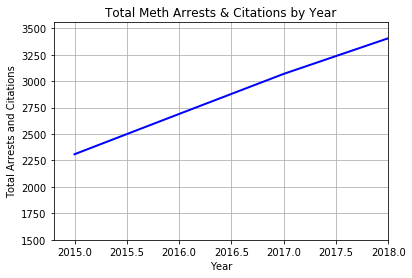

In [10]:
# plot arrests
plt.plot(meth_arrests_by_year, color= 'b', linewidth=2.0)
plt.grid()
plt.xlim(right=2018)
plt.ylim(bottom=1500)
plt.title("Total Meth Arrests & Citations by Year")
plt.xlabel('Year')
plt.ylabel('Total Arrests and Citations')

plt.show()

In [11]:
# check total arrests and citations and by year
meth_arrests_by_type_by_year = meth_arrests_clean_df.groupby(['activityType','Year']).count()['activityNumber']
meth_arrests_by_type = meth_arrests_clean_df.groupby('activityType').count()['activityNumber']
print(meth_arrests_by_type, meth_arrests_by_type_by_year)


activityType
ARREST      8456
CITATION    3425
Name: activityNumber, dtype: int64 activityType  Year
ARREST        2015    1586
              2016    1790
              2017    2192
              2018    2551
              2019     337
CITATION      2015     723
              2016     900
              2017     877
              2018     855
              2019      70
Name: activityNumber, dtype: int64


In [12]:
# arrests by neighborhood
meth_arrests_by_location = meth_arrests_clean_df.groupby('Neighborhood').count()['Year']

meth_arrests_by_location

Neighborhood
Adams North               40
Allied Gardens            22
Alta Vista                 6
Azalea/Hollywood Park     66
Balboa Park              106
Barrio Logan             250
Bay Ho                    60
Bay Park                 118
Bay Terraces             103
Birdland                  16
Black Mountain Ranch       5
Border                    13
Broadway Heights           2
Carmel Mountain           17
Carmel Valley             43
Castle                   121
Cherokee Point            85
Chollas Creek             33
Chollas View              65
Clairemont Mesa East     161
Clairemont Mesa West      54
Colina del Sol           299
College East              22
College West              23
Core-Columbia            384
Corridor                 172
Cortez                    57
Del Cerro                 34
Del Mar Heights           16
East Village             978
                        ... 
Rancho Penasquitos        45
Redwood Village           28
Ridgeview/Webster         63
R

In [13]:
# after talking with SDPD we discovered only some codes were related to meth the others were controlled substance
# cleaned the dataframe to reflect only meth arrests

meth_1 = meth_arrests_clean_df[(meth_arrests_clean_df['violationSection'] == '11377(A)') | (meth_arrests_clean_df['violationSection'] == '11379(A)')]

meth_1

,activityNumber,activityType,activityDate,violationType,violationSection,chargeDescription,beat,streetNumber,streetName,Neighborhood,Year
0,1568177,CITATION,2015-01-01,HS,11377(A),POSSESS CONTROLLED SUBSTANCE (M),321,4647.0,ZION,Grantville,2015
1,15700560A,ARREST,2015-01-03,HS,11377(A),POSSESS CONTROLLED SUBSTANCE (F),321,4647.0,ZION,Grantville,2015
2,15J0007401,ARREST,2015-01-18,HS,11377(A),POSSESS CONTROLLED SUBSTANCE (F),321,10300.0,FRIARS,Grantville,2015
4,15714896,ARREST,2015-03-07,HS,11377(A),POSSESS CONTROLLED SUBSTANCE (M),321,6500.0,MISSION GORGE,Grantville,2015
5,15720915,ARREST,2015-04-02,HS,11377(A),POSSESS CONTROLLED SUBSTANCE (M),321,6000.0,MISSION GORGE,Grantville,2015
6,1565598,CITATION,2015-04-16,HS,11377(A),POSSESS CONTROLLED SUBSTANCE (M),321,4380.0,ALVARADO CANYON,Grantville,2015
7,15729776,ARREST,2015-05-09,HS,11377(A),POSSESS CONTROLLED SUBSTANCE (M),321,5829.0,MISSION GORGE,Grantville,2015
8,15729784,ARREST,2015-05-09,HS,11377(A),POSSESS CONTROLLED SUBSTANCE (F),321,5920.0,FAIRMOUNT,Grantville,2015
9,1692981,CITATION,2015-05-18,HS,11377(A),POSSESS CONTROLLED SUBSTANCE (M),321,5841.0,MISSION GORGE,Grantville,2015
10,15760711A,ARREST,2015-09-15,HS,11377(A),POSSESS CONTROLLED SUBSTANCE (F),321,4647.0,ZION,Grantville,2015


In [15]:
# checking data types
meth_arrests_clean_df.dtypes

activityNumber               object
activityType                 object
activityDate         datetime64[ns]
violationType                object
violationSection             object
chargeDescription            object
beat                          int64
streetNumber                float64
streetName                   object
Neighborhood                 object
Year                          int64
dtype: object

In [14]:
# checking arrests by year with new cleaned dataframe
meth_arrests_by_year_1 = meth_1.groupby('Year').count()['Neighborhood']

meth_arrests_by_year_1

Year
2015    2017
2016    2432
2017    2754
2018    3035
2019     353
Name: Neighborhood, dtype: int64

In [15]:
# change year column from int to string
meth_1  = meth_1.astype({"Year": object})

meth_1.dtypes

activityNumber               object
activityType                 object
activityDate         datetime64[ns]
violationType                object
violationSection             object
chargeDescription            object
beat                          int64
streetNumber                float64
streetName                   object
Neighborhood                 object
Year                         object
dtype: object

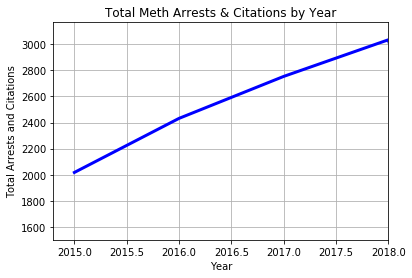

In [16]:
# plot arrests with new dataframe
plt.plot(meth_arrests_by_year_1, color= 'b', linewidth=3.0)
plt.grid()
plt.xlim(right=2018)
plt.ylim(bottom=1500)
plt.title("Total Meth Arrests & Citations by Year")
plt.xlabel('Year')
plt.ylabel('Total Arrests and Citations')

plt.show()

In [17]:
# check total arrests and citations and by year with new dataframe
meth_arrests_by_type_by_year_1 = meth_1.groupby(['activityType','Year']).count()['activityNumber']
meth_arrests_by_type_1 = meth_1.groupby('activityType').count()['activityNumber']
print(meth_arrests_by_type_1, meth_arrests_by_type_by_year_1)

activityType
ARREST      7166
CITATION    3425
Name: activityNumber, dtype: int64 activityType  Year
ARREST        2015    1294
              2016    1532
              2017    1877
              2018    2180
              2019     283
CITATION      2015     723
              2016     900
              2017     877
              2018     855
              2019      70
Name: activityNumber, dtype: int64


In [18]:
# export to csv
meth_arrests_by_type_by_year_1 = pd.DataFrame(meth_arrests_by_type_by_year_1)

meth_arrests_by_type_by_year_1.to_csv('san_diego_arrests_byYear.csv', index=False)

In [53]:
# export to csv
meth_arrests_by_type_by_year_1 = pd.DataFrame(meth_arrests_by_type_by_year_1)

meth_arrests_by_type_by_year_1.to_csv('meth_arrests_byType_Year.csv', index=False)

In [17]:
# arrests by neighborhood with cleaned dataframe
meth_arrests_by_location_1 = meth_1.groupby('Neighborhood').count()['Year']

meth_arrests_by_location_1

Neighborhood
Adams North               36
Allied Gardens            20
Alta Vista                 5
Azalea/Hollywood Park     57
Balboa Park               97
Barrio Logan             221
Bay Ho                    55
Bay Park                 108
Bay Terraces              83
Birdland                  14
Black Mountain Ranch       4
Border                    11
Broadway Heights           2
Carmel Mountain           17
Carmel Valley             39
Castle                   108
Cherokee Point            79
Chollas Creek             28
Chollas View              56
Clairemont Mesa East     152
Clairemont Mesa West      50
Colina del Sol           276
College East              21
College West              18
Core-Columbia            345
Corridor                 160
Cortez                    50
Del Cerro                 29
Del Mar Heights           15
East Village             845
                        ... 
Rancho Penasquitos        43
Redwood Village           26
Ridgeview/Webster         54
R

In [18]:
# turn arrests by neighborhood into dataframe
meth_1_df = pd.DataFrame(meth_arrests_by_location_1)
meth_1_df.head()

,Year
Neighborhood,
Adams North,36
Allied Gardens,20
Alta Vista,5
Azalea/Hollywood Park,57
Balboa Park,97


In [19]:
# sort to see neighborhoods with most arrests
meth_sorted = meth_1_df.sort_values(by='Year', ascending=False)

meth_sorted.head()

,Year
Neighborhood,
East Village,845
Midway District,649
Pacific Beach,486
North Park,469
Core-Columbia,345


In [38]:
# creating a program to pull geocodes for the neighborhoods from google API to geo map data
logger = logging.getLogger("root")
logger.setLevel(logging.DEBUG)
# create console handler
ch = logging.StreamHandler()
ch.setLevel(logging.DEBUG)
logger.addHandler(ch)


In [58]:
BACKOFF_TIME = 30
# Set your output file name here.
output_filename = 'output_lat_long.csv'
# Set your input file here
input_filename = 'meth_arrests_clean.csv'
# Specify the column name in your input data that contains addresses here
address_column_name = "Neighborhood"
# Return Full Google Results? If True, full JSON results from Google are included in output
RETURN_FULL_RESULTS = False

In [56]:
# Read the data to a Pandas Dataframe
data = pd.read_csv(input_filename, encoding='utf8')

if address_column_name not in data.columns:
	raise ValueError("Missing Address column in input data")

# Form a list of addresses for geocoding:
# Make a big list of all of the addresses to be processed.
addresses = data[address_column_name].tolist()

# make it more accurate
addresses = (data[address_column_name] + ',San Diego').tolist()

In [59]:
def get_google_results(address, api_key, return_full_response=False):

    # Set up your Geocoding url
    geocode_url = "https://maps.googleapis.com/maps/api/geocode/json?address={}".format(address)
    if api_key is not None:
        geocode_url = geocode_url + "&key={}".format(api_key)
        
    # Ping google for the reuslts:
    results = requests.get(geocode_url)
    # Results will be in JSON format - convert to dict using requests functionality
    results = results.json()
    
    # if there's no results or an error, return empty results.
    if len(results['results']) == 0:
        output = {
            "formatted_address" : None,
            "latitude": None,
            "longitude": None,
            "accuracy": None,
            "google_place_id": None,
            "type": None,
            "postcode": None
        }
    else:    
        answer = results['results'][0]
        output = {
            "formatted_address" : answer.get('formatted_address'),
            "latitude": answer.get('geometry').get('location').get('lat'),
            "longitude": answer.get('geometry').get('location').get('lng'),
            "accuracy": answer.get('geometry').get('location_type'),
            "google_place_id": answer.get("place_id"),
            "type": ",".join(answer.get('types')),
            "postcode": ",".join([x['long_name'] for x in answer.get('address_components') 
                                  if 'postal_code' in x.get('types')])
        }
        
    # Append some other details:    
    output['input_string'] = address
    output['number_of_results'] = len(results['results'])
    output['status'] = results.get('status')
    if return_full_response is True:
        output['response'] = results
    
    return output

# Ensure, before we start, that the API key is ok/valid, and internet access is ok
test_result = get_google_results("London, England", api_key, RETURN_FULL_RESULTS)
if (test_result['status'] != 'OK') or (test_result['formatted_address'] != 'London, UK'):
    logger.warning("There was an error when testing the Google Geocoder.")
    raise ConnectionError('Problem with test results from Google Geocode - check your API key and internet connection.')

# Create a list to hold results
results = []
# loop through each address in turn
for address in addresses:
    # While the address geocoding is not finished:
    geocoded = False
    while geocoded is not True:
        # Geocode the address with google
        try:
            geocode_result = get_google_results(address, api_key, return_full_response=RETURN_FULL_RESULTS)
        except Exception as e:
            logger.exception(e)
            logger.error("Major error with {}".format(address))
            logger.error("Skipping!")
            geocoded = True
            
        # If we're over the API limit, backoff for a while and try again later.
        if geocode_result['status'] == 'OVER_QUERY_LIMIT':
            logger.info("Hit Query Limit! Backing off for a bit.")
            time.sleep(BACKOFF_TIME * 60) # sleep for 30 minutes
            geocoded = False
        else:
            # If we're ok with API use, save the results
            # Note that the results might be empty / non-ok - log this
            if geocode_result['status'] != 'OK':
                logger.warning("Error geocoding {}: {}".format(address, geocode_result['status']))
            logger.debug("Geocoded: {}: {}".format(address, geocode_result['status']))
            results.append(geocode_result)           
            geocoded = True

    # Print status every 100 addresses
    if len(results) % 100 == 0:
    	logger.info("Completed {} of {} address".format(len(results), len(addresses)))
            
    # Every 500 addresses, save progress to file(in case of a failure
    if len(results) % 500 == 0:
        pd.DataFrame(results).to_csv("{}_bak".format(output_filename))

# All done
logger.info("Finished geocoding all addresses")
# Write the full results to csv using the pandas library.
pd.DataFrame(results).to_csv(output_filename, encoding='utf8')

Geocoded: Grantville,San Diego: OK
Geocoded: Grantville,San Diego: OK
Geocoded: Grantville,San Diego: OK
Geocoded: Grantville,San Diego: OK
Geocoded: Grantville,San Diego: OK
Geocoded: Grantville,San Diego: OK
Geocoded: Grantville,San Diego: OK
Geocoded: Grantville,San Diego: OK
Geocoded: Grantville,San Diego: OK
Geocoded: Grantville,San Diego: OK
Geocoded: Grantville,San Diego: OK
Geocoded: Grantville,San Diego: OK
Geocoded: Grantville,San Diego: OK
Geocoded: Grantville,San Diego: OK
Geocoded: Grantville,San Diego: OK
Geocoded: Grantville,San Diego: OK
Geocoded: Grantville,San Diego: OK
Geocoded: Grantville,San Diego: OK
Geocoded: Grantville,San Diego: OK
Geocoded: Grantville,San Diego: OK
Geocoded: Grantville,San Diego: OK
Geocoded: Grantville,San Diego: OK
Geocoded: Grantville,San Diego: OK
Geocoded: Grantville,San Diego: OK
Geocoded: Grantville,San Diego: OK
Geocoded: Grantville,San Diego: OK
Geocoded: Grantville,San Diego: OK
Geocoded: Grantville,San Diego: OK
Geocoded: Grantville

Geocoded: Mission Valley West,San Diego: OK
Geocoded: Mission Valley West,San Diego: OK
Completed 200 of 10591 address
Geocoded: Mission Valley West,San Diego: OK
Geocoded: Mission Valley West,San Diego: OK
Geocoded: Mission Valley West,San Diego: OK
Geocoded: Mission Valley West,San Diego: OK
Geocoded: Mission Valley West,San Diego: OK
Geocoded: Mission Valley West,San Diego: OK
Geocoded: Mission Valley West,San Diego: OK
Geocoded: Mission Valley West,San Diego: OK
Geocoded: Mission Valley West,San Diego: OK
Geocoded: Mission Valley West,San Diego: OK
Geocoded: Mission Valley West,San Diego: OK
Geocoded: Mission Valley West,San Diego: OK
Geocoded: Mission Valley West,San Diego: OK
Geocoded: Mission Valley West,San Diego: OK
Geocoded: Mission Valley West,San Diego: OK
Geocoded: Mission Valley West,San Diego: OK
Geocoded: Mission Valley West,San Diego: OK
Geocoded: Mission Valley West,San Diego: OK
Geocoded: Mission Valley West,San Diego: OK
Geocoded: Mission Valley West,San Diego: OK
G

Geocoded: Teralta West,San Diego: OK
Geocoded: Teralta West,San Diego: OK
Geocoded: Teralta West,San Diego: OK
Geocoded: Teralta West,San Diego: OK
Geocoded: Teralta West,San Diego: OK
Geocoded: Teralta West,San Diego: OK
Geocoded: Teralta West,San Diego: OK
Geocoded: Teralta West,San Diego: OK
Geocoded: Teralta West,San Diego: OK
Geocoded: Teralta West,San Diego: OK
Geocoded: Teralta West,San Diego: OK
Geocoded: Teralta West,San Diego: OK
Geocoded: Teralta West,San Diego: OK
Geocoded: Teralta West,San Diego: OK
Geocoded: Teralta West,San Diego: OK
Geocoded: Teralta West,San Diego: OK
Geocoded: Teralta West,San Diego: OK
Geocoded: Teralta West,San Diego: OK
Geocoded: Teralta West,San Diego: OK
Geocoded: Teralta West,San Diego: OK
Geocoded: Teralta West,San Diego: OK
Geocoded: Teralta West,San Diego: OK
Geocoded: Teralta West,San Diego: OK
Geocoded: Teralta West,San Diego: OK
Geocoded: Teralta West,San Diego: OK
Geocoded: Teralta West,San Diego: OK
Geocoded: Teralta West,San Diego: OK
G

Geocoded: Pacific Beach,San Diego: OK
Geocoded: Pacific Beach,San Diego: OK
Geocoded: Pacific Beach,San Diego: OK
Geocoded: Pacific Beach,San Diego: OK
Geocoded: Pacific Beach,San Diego: OK
Geocoded: Pacific Beach,San Diego: OK
Geocoded: Pacific Beach,San Diego: OK
Geocoded: Pacific Beach,San Diego: OK
Geocoded: Pacific Beach,San Diego: OK
Geocoded: Pacific Beach,San Diego: OK
Geocoded: Pacific Beach,San Diego: OK
Geocoded: Pacific Beach,San Diego: OK
Geocoded: Pacific Beach,San Diego: OK
Geocoded: Pacific Beach,San Diego: OK
Geocoded: Pacific Beach,San Diego: OK
Geocoded: Pacific Beach,San Diego: OK
Geocoded: Pacific Beach,San Diego: OK
Geocoded: Pacific Beach,San Diego: OK
Geocoded: Pacific Beach,San Diego: OK
Geocoded: Pacific Beach,San Diego: OK
Geocoded: Pacific Beach,San Diego: OK
Geocoded: Pacific Beach,San Diego: OK
Geocoded: Pacific Beach,San Diego: OK
Geocoded: Pacific Beach,San Diego: OK
Geocoded: Pacific Beach,San Diego: OK
Geocoded: Pacific Beach,San Diego: OK
Geocoded: Pa

Geocoded: Pacific Beach,San Diego: OK
Geocoded: Pacific Beach,San Diego: OK
Geocoded: Pacific Beach,San Diego: OK
Geocoded: Pacific Beach,San Diego: OK
Geocoded: Pacific Beach,San Diego: OK
Geocoded: Pacific Beach,San Diego: OK
Geocoded: Pacific Beach,San Diego: OK
Geocoded: Pacific Beach,San Diego: OK
Geocoded: Pacific Beach,San Diego: OK
Geocoded: Pacific Beach,San Diego: OK
Geocoded: Pacific Beach,San Diego: OK
Geocoded: Pacific Beach,San Diego: OK
Geocoded: Pacific Beach,San Diego: OK
Geocoded: Pacific Beach,San Diego: OK
Geocoded: Pacific Beach,San Diego: OK
Geocoded: Pacific Beach,San Diego: OK
Geocoded: Pacific Beach,San Diego: OK
Geocoded: Pacific Beach,San Diego: OK
Geocoded: Pacific Beach,San Diego: OK
Geocoded: Pacific Beach,San Diego: OK
Geocoded: Pacific Beach,San Diego: OK
Geocoded: Pacific Beach,San Diego: OK
Geocoded: Pacific Beach,San Diego: OK
Geocoded: Pacific Beach,San Diego: OK
Geocoded: Pacific Beach,San Diego: OK
Geocoded: Pacific Beach,San Diego: OK
Geocoded: Pa

Geocoded: East Village,San Diego: OK
Geocoded: East Village,San Diego: OK
Geocoded: East Village,San Diego: OK
Geocoded: East Village,San Diego: OK
Geocoded: East Village,San Diego: OK
Geocoded: East Village,San Diego: OK
Geocoded: East Village,San Diego: OK
Geocoded: East Village,San Diego: OK
Geocoded: East Village,San Diego: OK
Geocoded: East Village,San Diego: OK
Geocoded: East Village,San Diego: OK
Geocoded: East Village,San Diego: OK
Geocoded: East Village,San Diego: OK
Geocoded: East Village,San Diego: OK
Geocoded: East Village,San Diego: OK
Geocoded: East Village,San Diego: OK
Geocoded: East Village,San Diego: OK
Geocoded: East Village,San Diego: OK
Geocoded: East Village,San Diego: OK
Geocoded: East Village,San Diego: OK
Geocoded: East Village,San Diego: OK
Geocoded: East Village,San Diego: OK
Geocoded: East Village,San Diego: OK
Geocoded: East Village,San Diego: OK
Geocoded: East Village,San Diego: OK
Geocoded: East Village,San Diego: OK
Geocoded: East Village,San Diego: OK
G

Geocoded: East Village,San Diego: OK
Geocoded: East Village,San Diego: OK
Geocoded: East Village,San Diego: OK
Geocoded: East Village,San Diego: OK
Geocoded: East Village,San Diego: OK
Geocoded: East Village,San Diego: OK
Geocoded: East Village,San Diego: OK
Geocoded: East Village,San Diego: OK
Geocoded: East Village,San Diego: OK
Geocoded: East Village,San Diego: OK
Geocoded: East Village,San Diego: OK
Geocoded: East Village,San Diego: OK
Geocoded: East Village,San Diego: OK
Geocoded: East Village,San Diego: OK
Geocoded: East Village,San Diego: OK
Geocoded: East Village,San Diego: OK
Geocoded: East Village,San Diego: OK
Geocoded: East Village,San Diego: OK
Geocoded: East Village,San Diego: OK
Geocoded: East Village,San Diego: OK
Geocoded: East Village,San Diego: OK
Geocoded: East Village,San Diego: OK
Geocoded: East Village,San Diego: OK
Geocoded: East Village,San Diego: OK
Geocoded: East Village,San Diego: OK
Geocoded: East Village,San Diego: OK
Geocoded: East Village,San Diego: OK
G

Geocoded: East Village,San Diego: OK
Geocoded: East Village,San Diego: OK
Geocoded: East Village,San Diego: OK
Geocoded: East Village,San Diego: OK
Geocoded: East Village,San Diego: OK
Geocoded: East Village,San Diego: OK
Geocoded: East Village,San Diego: OK
Geocoded: East Village,San Diego: OK
Geocoded: East Village,San Diego: OK
Geocoded: East Village,San Diego: OK
Geocoded: East Village,San Diego: OK
Geocoded: East Village,San Diego: OK
Geocoded: East Village,San Diego: OK
Completed 1500 of 10591 address
Geocoded: East Village,San Diego: OK
Geocoded: East Village,San Diego: OK
Geocoded: East Village,San Diego: OK
Geocoded: East Village,San Diego: OK
Geocoded: East Village,San Diego: OK
Geocoded: East Village,San Diego: OK
Geocoded: East Village,San Diego: OK
Geocoded: East Village,San Diego: OK
Geocoded: East Village,San Diego: OK
Geocoded: East Village,San Diego: OK
Geocoded: East Village,San Diego: OK
Geocoded: East Village,San Diego: OK
Geocoded: East Village,San Diego: OK
Geocod

Geocoded: East Village,San Diego: OK
Geocoded: East Village,San Diego: OK
Geocoded: East Village,San Diego: OK
Geocoded: East Village,San Diego: OK
Geocoded: East Village,San Diego: OK
Geocoded: East Village,San Diego: OK
Geocoded: East Village,San Diego: OK
Geocoded: East Village,San Diego: OK
Geocoded: East Village,San Diego: OK
Geocoded: East Village,San Diego: OK
Geocoded: East Village,San Diego: OK
Geocoded: East Village,San Diego: OK
Geocoded: East Village,San Diego: OK
Geocoded: East Village,San Diego: OK
Geocoded: East Village,San Diego: OK
Geocoded: East Village,San Diego: OK
Geocoded: East Village,San Diego: OK
Geocoded: East Village,San Diego: OK
Geocoded: East Village,San Diego: OK
Geocoded: East Village,San Diego: OK
Geocoded: East Village,San Diego: OK
Geocoded: East Village,San Diego: OK
Geocoded: East Village,San Diego: OK
Geocoded: East Village,San Diego: OK
Geocoded: East Village,San Diego: OK
Geocoded: East Village,San Diego: OK
Geocoded: East Village,San Diego: OK
G

Geocoded: Morena,San Diego: OK
Geocoded: Morena,San Diego: OK
Geocoded: Morena,San Diego: OK
Geocoded: Morena,San Diego: OK
Geocoded: Morena,San Diego: OK
Geocoded: Morena,San Diego: OK
Geocoded: Morena,San Diego: OK
Geocoded: Morena,San Diego: OK
Geocoded: Morena,San Diego: OK
Geocoded: Morena,San Diego: OK
Geocoded: Morena,San Diego: OK
Geocoded: Morena,San Diego: OK
Geocoded: Morena,San Diego: OK
Geocoded: Morena,San Diego: OK
Geocoded: Morena,San Diego: OK
Geocoded: Morena,San Diego: OK
Geocoded: Grant Hill,San Diego: OK
Geocoded: Grant Hill,San Diego: OK
Geocoded: Grant Hill,San Diego: OK
Geocoded: Grant Hill,San Diego: OK
Geocoded: Grant Hill,San Diego: OK
Geocoded: Grant Hill,San Diego: OK
Geocoded: Grant Hill,San Diego: OK
Geocoded: Grant Hill,San Diego: OK
Geocoded: Grant Hill,San Diego: OK
Geocoded: Grant Hill,San Diego: OK
Geocoded: Grant Hill,San Diego: OK
Geocoded: Grant Hill,San Diego: OK
Geocoded: Grant Hill,San Diego: OK
Geocoded: Grant Hill,San Diego: OK
Geocoded: Gran

Geocoded: Linda Vista,San Diego: OK
Geocoded: Linda Vista,San Diego: OK
Geocoded: Linda Vista,San Diego: OK
Geocoded: Linda Vista,San Diego: OK
Geocoded: Linda Vista,San Diego: OK
Geocoded: Linda Vista,San Diego: OK
Geocoded: Linda Vista,San Diego: OK
Geocoded: Linda Vista,San Diego: OK
Geocoded: Linda Vista,San Diego: OK
Geocoded: Linda Vista,San Diego: OK
Geocoded: Linda Vista,San Diego: OK
Geocoded: Linda Vista,San Diego: OK
Geocoded: Linda Vista,San Diego: OK
Geocoded: Linda Vista,San Diego: OK
Geocoded: Linda Vista,San Diego: OK
Geocoded: Linda Vista,San Diego: OK
Geocoded: Linda Vista,San Diego: OK
Geocoded: Linda Vista,San Diego: OK
Completed 2200 of 10591 address
Geocoded: Linda Vista,San Diego: OK
Geocoded: Linda Vista,San Diego: OK
Geocoded: Linda Vista,San Diego: OK
Geocoded: Linda Vista,San Diego: OK
Geocoded: Linda Vista,San Diego: OK
Geocoded: Linda Vista,San Diego: OK
Geocoded: Linda Vista,San Diego: OK
Geocoded: Linda Vista,San Diego: OK
Geocoded: Linda Vista,San Diego:

Geocoded: North Park,San Diego: OK
Geocoded: North Park,San Diego: OK
Geocoded: North Park,San Diego: OK
Geocoded: North Park,San Diego: OK
Geocoded: North Park,San Diego: OK
Geocoded: North Park,San Diego: OK
Geocoded: North Park,San Diego: OK
Geocoded: North Park,San Diego: OK
Geocoded: North Park,San Diego: OK
Geocoded: North Park,San Diego: OK
Geocoded: North Park,San Diego: OK
Geocoded: North Park,San Diego: OK
Geocoded: North Park,San Diego: OK
Geocoded: North Park,San Diego: OK
Geocoded: North Park,San Diego: OK
Geocoded: North Park,San Diego: OK
Geocoded: North Park,San Diego: OK
Geocoded: North Park,San Diego: OK
Geocoded: North Park,San Diego: OK
Geocoded: North Park,San Diego: OK
Geocoded: North Park,San Diego: OK
Geocoded: North Park,San Diego: OK
Geocoded: North Park,San Diego: OK
Geocoded: North Park,San Diego: OK
Geocoded: North Park,San Diego: OK
Geocoded: North Park,San Diego: OK
Geocoded: North Park,San Diego: OK
Geocoded: North Park,San Diego: OK
Geocoded: North Park

Geocoded: North Park,San Diego: OK
Geocoded: North Park,San Diego: OK
Geocoded: North Park,San Diego: OK
Geocoded: North Park,San Diego: OK
Geocoded: North Park,San Diego: OK
Geocoded: North Park,San Diego: OK
Geocoded: North Park,San Diego: OK
Geocoded: North Park,San Diego: OK
Geocoded: North Park,San Diego: OK
Geocoded: North Park,San Diego: OK
Geocoded: North Park,San Diego: OK
Geocoded: North Park,San Diego: OK
Geocoded: North Park,San Diego: OK
Geocoded: North Park,San Diego: OK
Geocoded: North Park,San Diego: OK
Geocoded: North Park,San Diego: OK
Geocoded: North Park,San Diego: OK
Geocoded: North Park,San Diego: OK
Geocoded: North Park,San Diego: OK
Geocoded: North Park,San Diego: OK
Geocoded: North Park,San Diego: OK
Geocoded: North Park,San Diego: OK
Geocoded: North Park,San Diego: OK
Geocoded: North Park,San Diego: OK
Geocoded: North Park,San Diego: OK
Geocoded: North Park,San Diego: OK
Geocoded: North Park,San Diego: OK
Geocoded: North Park,San Diego: OK
Geocoded: North Park

Geocoded: Clairemont Mesa East,San Diego: OK
Geocoded: Clairemont Mesa East,San Diego: OK
Geocoded: Clairemont Mesa East,San Diego: OK
Geocoded: Clairemont Mesa East,San Diego: OK
Geocoded: Clairemont Mesa East,San Diego: OK
Geocoded: Clairemont Mesa East,San Diego: OK
Geocoded: Clairemont Mesa East,San Diego: OK
Geocoded: Clairemont Mesa East,San Diego: OK
Geocoded: Clairemont Mesa East,San Diego: OK
Geocoded: Clairemont Mesa East,San Diego: OK
Geocoded: Clairemont Mesa East,San Diego: OK
Geocoded: Clairemont Mesa East,San Diego: OK
Geocoded: Clairemont Mesa East,San Diego: OK
Geocoded: Clairemont Mesa East,San Diego: OK
Geocoded: Clairemont Mesa East,San Diego: OK
Geocoded: Clairemont Mesa East,San Diego: OK
Geocoded: Clairemont Mesa East,San Diego: OK
Geocoded: Clairemont Mesa East,San Diego: OK
Geocoded: Clairemont Mesa East,San Diego: OK
Geocoded: Clairemont Mesa East,San Diego: OK
Geocoded: Clairemont Mesa East,San Diego: OK
Geocoded: Clairemont Mesa East,San Diego: OK
Geocoded: 

Geocoded: Point Loma Heights,San Diego: OK
Geocoded: Point Loma Heights,San Diego: OK
Geocoded: Point Loma Heights,San Diego: OK
Geocoded: Point Loma Heights,San Diego: OK
Geocoded: Point Loma Heights,San Diego: OK
Geocoded: Point Loma Heights,San Diego: OK
Geocoded: Point Loma Heights,San Diego: OK
Geocoded: Point Loma Heights,San Diego: OK
Geocoded: Point Loma Heights,San Diego: OK
Geocoded: Point Loma Heights,San Diego: OK
Geocoded: Point Loma Heights,San Diego: OK
Geocoded: Point Loma Heights,San Diego: OK
Geocoded: Point Loma Heights,San Diego: OK
Geocoded: Point Loma Heights,San Diego: OK
Geocoded: Point Loma Heights,San Diego: OK
Geocoded: Point Loma Heights,San Diego: OK
Geocoded: Point Loma Heights,San Diego: OK
Geocoded: Point Loma Heights,San Diego: OK
Geocoded: Point Loma Heights,San Diego: OK
Geocoded: Point Loma Heights,San Diego: OK
Geocoded: Point Loma Heights,San Diego: OK
Geocoded: Point Loma Heights,San Diego: OK
Geocoded: Point Loma Heights,San Diego: OK
Geocoded: P

Geocoded: Mountain View,San Diego: OK
Geocoded: Mountain View,San Diego: OK
Geocoded: Mountain View,San Diego: OK
Geocoded: Mountain View,San Diego: OK
Geocoded: Mountain View,San Diego: OK
Geocoded: Mountain View,San Diego: OK
Geocoded: Mountain View,San Diego: OK
Geocoded: Mountain View,San Diego: OK
Geocoded: Mountain View,San Diego: OK
Geocoded: Mountain View,San Diego: OK
Geocoded: Mountain View,San Diego: OK
Geocoded: Mountain View,San Diego: OK
Geocoded: Mountain View,San Diego: OK
Geocoded: Mountain View,San Diego: OK
Geocoded: Mountain View,San Diego: OK
Geocoded: Mountain View,San Diego: OK
Geocoded: Mountain View,San Diego: OK
Geocoded: Mountain View,San Diego: OK
Geocoded: Mountain View,San Diego: OK
Geocoded: Mountain View,San Diego: OK
Geocoded: Mountain View,San Diego: OK
Geocoded: Mountain View,San Diego: OK
Geocoded: Mountain View,San Diego: OK
Geocoded: Mountain View,San Diego: OK
Geocoded: Mountain View,San Diego: OK
Geocoded: Mountain View,San Diego: OK
Geocoded: Mo

Geocoded: Barrio Logan,San Diego: OK
Geocoded: Barrio Logan,San Diego: OK
Geocoded: Barrio Logan,San Diego: OK
Geocoded: Barrio Logan,San Diego: OK
Geocoded: Barrio Logan,San Diego: OK
Geocoded: Barrio Logan,San Diego: OK
Geocoded: Barrio Logan,San Diego: OK
Geocoded: Barrio Logan,San Diego: OK
Geocoded: Barrio Logan,San Diego: OK
Geocoded: Barrio Logan,San Diego: OK
Geocoded: Barrio Logan,San Diego: OK
Geocoded: Barrio Logan,San Diego: OK
Geocoded: Barrio Logan,San Diego: OK
Geocoded: Barrio Logan,San Diego: OK
Geocoded: Barrio Logan,San Diego: OK
Geocoded: Barrio Logan,San Diego: OK
Geocoded: Barrio Logan,San Diego: OK
Completed 3500 of 10591 address
Geocoded: Barrio Logan,San Diego: OK
Geocoded: Barrio Logan,San Diego: OK
Geocoded: Barrio Logan,San Diego: OK
Geocoded: Barrio Logan,San Diego: OK
Geocoded: Barrio Logan,San Diego: OK
Geocoded: Barrio Logan,San Diego: OK
Geocoded: Barrio Logan,San Diego: OK
Geocoded: Barrio Logan,San Diego: OK
Geocoded: Barrio Logan,San Diego: OK
Geocod

Geocoded: Bay Park,San Diego: OK
Geocoded: Bay Park,San Diego: OK
Geocoded: Bay Park,San Diego: OK
Geocoded: Bay Park,San Diego: OK
Geocoded: Bay Park,San Diego: OK
Geocoded: Bay Park,San Diego: OK
Geocoded: Bay Park,San Diego: OK
Geocoded: Bay Park,San Diego: OK
Geocoded: Bay Park,San Diego: OK
Geocoded: Bay Park,San Diego: OK
Geocoded: Bay Park,San Diego: OK
Geocoded: Bay Park,San Diego: OK
Geocoded: Bay Park,San Diego: OK
Geocoded: Bay Park,San Diego: OK
Geocoded: Bay Park,San Diego: OK
Geocoded: Bay Park,San Diego: OK
Geocoded: Bay Park,San Diego: OK
Geocoded: Bay Park,San Diego: OK
Geocoded: Bay Park,San Diego: OK
Geocoded: Bay Park,San Diego: OK
Geocoded: Bay Park,San Diego: OK
Geocoded: Bay Park,San Diego: OK
Geocoded: Bay Park,San Diego: OK
Geocoded: Bay Park,San Diego: OK
Geocoded: Bay Park,San Diego: OK
Geocoded: Bay Park,San Diego: OK
Geocoded: Bay Park,San Diego: OK
Geocoded: Bay Park,San Diego: OK
Geocoded: Bay Park,San Diego: OK
Geocoded: Bay Park,San Diego: OK
Geocoded: 

Geocoded: Mission Bay Park,San Diego: OK
Geocoded: Mission Bay Park,San Diego: OK
Geocoded: Mission Bay Park,San Diego: OK
Geocoded: Mission Bay Park,San Diego: OK
Geocoded: Mission Bay Park,San Diego: OK
Geocoded: Mission Bay Park,San Diego: OK
Geocoded: Mission Bay Park,San Diego: OK
Geocoded: Mission Bay Park,San Diego: OK
Geocoded: Mission Bay Park,San Diego: OK
Geocoded: Mission Bay Park,San Diego: OK
Geocoded: Kensington,San Diego: OK
Geocoded: Kensington,San Diego: OK
Geocoded: Kensington,San Diego: OK
Geocoded: Kensington,San Diego: OK
Geocoded: Kensington,San Diego: OK
Geocoded: Kensington,San Diego: OK
Geocoded: Kensington,San Diego: OK
Geocoded: Kensington,San Diego: OK
Geocoded: Kensington,San Diego: OK
Geocoded: Kensington,San Diego: OK
Geocoded: Kensington,San Diego: OK
Geocoded: Kensington,San Diego: OK
Geocoded: Kensington,San Diego: OK
Geocoded: Kensington,San Diego: OK
Geocoded: Kensington,San Diego: OK
Geocoded: Kensington,San Diego: OK
Geocoded: Kensington,San Diego

Geocoded: Teralta East,San Diego: OK
Geocoded: Teralta East,San Diego: OK
Geocoded: Teralta East,San Diego: OK
Geocoded: Teralta East,San Diego: OK
Geocoded: Teralta East,San Diego: OK
Geocoded: Teralta East,San Diego: OK
Geocoded: Teralta East,San Diego: OK
Geocoded: Teralta East,San Diego: OK
Geocoded: Teralta East,San Diego: OK
Geocoded: Teralta East,San Diego: OK
Geocoded: Teralta East,San Diego: OK
Geocoded: Teralta East,San Diego: OK
Geocoded: Teralta East,San Diego: OK
Geocoded: Teralta East,San Diego: OK
Geocoded: Teralta East,San Diego: OK
Geocoded: Teralta East,San Diego: OK
Geocoded: Teralta East,San Diego: OK
Geocoded: Teralta East,San Diego: OK
Geocoded: Teralta East,San Diego: OK
Geocoded: Teralta East,San Diego: OK
Geocoded: Teralta East,San Diego: OK
Geocoded: Teralta East,San Diego: OK
Geocoded: Teralta East,San Diego: OK
Geocoded: Teralta East,San Diego: OK
Geocoded: Teralta East,San Diego: OK
Geocoded: Teralta East,San Diego: OK
Geocoded: Teralta East,San Diego: OK
G

Geocoded: Teralta East,San Diego: OK
Geocoded: Teralta East,San Diego: OK
Geocoded: Teralta East,San Diego: OK
Geocoded: Teralta East,San Diego: OK
Geocoded: Teralta East,San Diego: OK
Geocoded: Teralta East,San Diego: OK
Geocoded: Teralta East,San Diego: OK
Geocoded: Teralta East,San Diego: OK
Geocoded: Teralta East,San Diego: OK
Geocoded: Teralta East,San Diego: OK
Geocoded: Teralta East,San Diego: OK
Geocoded: Teralta East,San Diego: OK
Geocoded: Teralta East,San Diego: OK
Geocoded: Mission Valley East,San Diego: OK
Geocoded: Mission Valley East,San Diego: OK
Geocoded: Mission Valley East,San Diego: OK
Geocoded: Mission Valley East,San Diego: OK
Geocoded: Mission Valley East,San Diego: OK
Geocoded: Mission Valley East,San Diego: OK
Geocoded: Mission Valley East,San Diego: OK
Geocoded: Mission Valley East,San Diego: OK
Geocoded: Mission Valley East,San Diego: OK
Completed 4400 of 10591 address
Geocoded: Mission Valley East,San Diego: OK
Geocoded: Mission Valley East,San Diego: OK
Geo

Geocoded: Otay Mesa West,San Diego: OK
Geocoded: Otay Mesa West,San Diego: OK
Geocoded: Otay Mesa West,San Diego: OK
Geocoded: Otay Mesa West,San Diego: OK
Geocoded: Otay Mesa West,San Diego: OK
Geocoded: Otay Mesa West,San Diego: OK
Geocoded: Otay Mesa West,San Diego: OK
Geocoded: Otay Mesa West,San Diego: OK
Geocoded: Otay Mesa West,San Diego: OK
Geocoded: Otay Mesa West,San Diego: OK
Geocoded: Otay Mesa West,San Diego: OK
Geocoded: Otay Mesa West,San Diego: OK
Geocoded: Otay Mesa West,San Diego: OK
Geocoded: Otay Mesa West,San Diego: OK
Geocoded: Otay Mesa West,San Diego: OK
Geocoded: Otay Mesa West,San Diego: OK
Geocoded: Otay Mesa West,San Diego: OK
Geocoded: Otay Mesa West,San Diego: OK
Geocoded: Otay Mesa West,San Diego: OK
Geocoded: Otay Mesa West,San Diego: OK
Geocoded: Otay Mesa West,San Diego: OK
Geocoded: Otay Mesa West,San Diego: OK
Geocoded: Otay Mesa West,San Diego: OK
Geocoded: Otay Mesa West,San Diego: OK
Geocoded: Otay Mesa West,San Diego: OK
Geocoded: Otay Mesa West,

Geocoded: Hillcrest,San Diego: OK
Geocoded: Hillcrest,San Diego: OK
Completed 4800 of 10591 address
Geocoded: Hillcrest,San Diego: OK
Geocoded: Hillcrest,San Diego: OK
Geocoded: Hillcrest,San Diego: OK
Geocoded: Hillcrest,San Diego: OK
Geocoded: Hillcrest,San Diego: OK
Geocoded: Hillcrest,San Diego: OK
Geocoded: Hillcrest,San Diego: OK
Geocoded: Hillcrest,San Diego: OK
Geocoded: Hillcrest,San Diego: OK
Geocoded: Hillcrest,San Diego: OK
Geocoded: Hillcrest,San Diego: OK
Geocoded: Hillcrest,San Diego: OK
Geocoded: Hillcrest,San Diego: OK
Geocoded: Hillcrest,San Diego: OK
Geocoded: Hillcrest,San Diego: OK
Geocoded: Hillcrest,San Diego: OK
Geocoded: Hillcrest,San Diego: OK
Geocoded: Hillcrest,San Diego: OK
Geocoded: Hillcrest,San Diego: OK
Geocoded: Hillcrest,San Diego: OK
Geocoded: Hillcrest,San Diego: OK
Geocoded: Hillcrest,San Diego: OK
Geocoded: Hillcrest,San Diego: OK
Geocoded: Hillcrest,San Diego: OK
Geocoded: Hillcrest,San Diego: OK
Geocoded: Hillcrest,San Diego: OK
Geocoded: Hillcr

Geocoded: Corridor,San Diego: OK
Geocoded: Corridor,San Diego: OK
Geocoded: Corridor,San Diego: OK
Geocoded: Corridor,San Diego: OK
Geocoded: Corridor,San Diego: OK
Geocoded: Corridor,San Diego: OK
Geocoded: Corridor,San Diego: OK
Geocoded: Corridor,San Diego: OK
Geocoded: Corridor,San Diego: OK
Geocoded: Corridor,San Diego: OK
Geocoded: Corridor,San Diego: OK
Geocoded: Corridor,San Diego: OK
Geocoded: Corridor,San Diego: OK
Geocoded: Corridor,San Diego: OK
Geocoded: Corridor,San Diego: OK
Geocoded: Corridor,San Diego: OK
Geocoded: Corridor,San Diego: OK
Geocoded: Corridor,San Diego: OK
Geocoded: Corridor,San Diego: OK
Geocoded: Corridor,San Diego: OK
Geocoded: Corridor,San Diego: OK
Geocoded: Corridor,San Diego: OK
Geocoded: Corridor,San Diego: OK
Geocoded: Stockton,San Diego: OK
Geocoded: Stockton,San Diego: OK
Geocoded: Stockton,San Diego: OK
Geocoded: Stockton,San Diego: OK
Geocoded: Stockton,San Diego: OK
Geocoded: Stockton,San Diego: OK
Geocoded: Stockton,San Diego: OK
Geocoded: 

Geocoded: Core-Columbia,San Diego: OK
Geocoded: Core-Columbia,San Diego: OK
Geocoded: Core-Columbia,San Diego: OK
Geocoded: Core-Columbia,San Diego: OK
Geocoded: Core-Columbia,San Diego: OK
Geocoded: Core-Columbia,San Diego: OK
Geocoded: Core-Columbia,San Diego: OK
Geocoded: Core-Columbia,San Diego: OK
Geocoded: Core-Columbia,San Diego: OK
Geocoded: Core-Columbia,San Diego: OK
Geocoded: Core-Columbia,San Diego: OK
Geocoded: Core-Columbia,San Diego: OK
Geocoded: Core-Columbia,San Diego: OK
Geocoded: Core-Columbia,San Diego: OK
Geocoded: Core-Columbia,San Diego: OK
Geocoded: Core-Columbia,San Diego: OK
Geocoded: Core-Columbia,San Diego: OK
Geocoded: Core-Columbia,San Diego: OK
Geocoded: Core-Columbia,San Diego: OK
Geocoded: Core-Columbia,San Diego: OK
Geocoded: Core-Columbia,San Diego: OK
Geocoded: Core-Columbia,San Diego: OK
Geocoded: Core-Columbia,San Diego: OK
Geocoded: Core-Columbia,San Diego: OK
Geocoded: Core-Columbia,San Diego: OK
Geocoded: Core-Columbia,San Diego: OK
Geocoded: Co

Geocoded: Core-Columbia,San Diego: OK
Geocoded: Core-Columbia,San Diego: OK
Geocoded: Fairmount Village,San Diego: OK
Geocoded: Fairmount Village,San Diego: OK
Geocoded: Fairmount Village,San Diego: OK
Geocoded: Fairmount Village,San Diego: OK
Geocoded: Fairmount Village,San Diego: OK
Geocoded: Fairmount Village,San Diego: OK
Geocoded: Fairmount Village,San Diego: OK
Geocoded: Fairmount Village,San Diego: OK
Geocoded: Fairmount Village,San Diego: OK
Geocoded: Fairmount Village,San Diego: OK
Geocoded: Fairmount Village,San Diego: OK
Geocoded: Fairmount Village,San Diego: OK
Geocoded: Fairmount Village,San Diego: OK
Geocoded: Fairmount Village,San Diego: OK
Geocoded: Fairmount Village,San Diego: OK
Geocoded: Fairmount Village,San Diego: OK
Completed 5500 of 10591 address
Geocoded: Fairmount Village,San Diego: OK
Geocoded: Fairmount Village,San Diego: OK
Geocoded: Fairmount Village,San Diego: OK
Geocoded: Fairmount Village,San Diego: OK
Geocoded: Fairmount Village,San Diego: OK
Geocoded: 

Geocoded: Balboa Park,San Diego: OK
Geocoded: Balboa Park,San Diego: OK
Geocoded: Balboa Park,San Diego: OK
Geocoded: Balboa Park,San Diego: OK
Geocoded: Balboa Park,San Diego: OK
Geocoded: Balboa Park,San Diego: OK
Geocoded: Balboa Park,San Diego: OK
Geocoded: Balboa Park,San Diego: OK
Geocoded: Balboa Park,San Diego: OK
Geocoded: Balboa Park,San Diego: OK
Geocoded: Balboa Park,San Diego: OK
Geocoded: Balboa Park,San Diego: OK
Geocoded: Balboa Park,San Diego: OK
Completed 5700 of 10591 address
Geocoded: Balboa Park,San Diego: OK
Geocoded: Balboa Park,San Diego: OK
Geocoded: Balboa Park,San Diego: OK
Geocoded: Balboa Park,San Diego: OK
Geocoded: Balboa Park,San Diego: OK
Geocoded: Balboa Park,San Diego: OK
Geocoded: Balboa Park,San Diego: OK
Geocoded: Balboa Park,San Diego: OK
Geocoded: Balboa Park,San Diego: OK
Geocoded: Balboa Park,San Diego: OK
Geocoded: Balboa Park,San Diego: OK
Geocoded: Balboa Park,San Diego: OK
Geocoded: Balboa Park,San Diego: OK
Geocoded: Balboa Park,San Diego:

Geocoded: University Heights,San Diego: OK
Geocoded: University Heights,San Diego: OK
Geocoded: University Heights,San Diego: OK
Geocoded: University Heights,San Diego: OK
Geocoded: University Heights,San Diego: OK
Geocoded: University Heights,San Diego: OK
Geocoded: University Heights,San Diego: OK
Geocoded: University Heights,San Diego: OK
Completed 5900 of 10591 address
Geocoded: University Heights,San Diego: OK
Geocoded: University Heights,San Diego: OK
Geocoded: University Heights,San Diego: OK
Geocoded: University Heights,San Diego: OK
Geocoded: University Heights,San Diego: OK
Geocoded: La Jolla,San Diego: OK
Geocoded: La Jolla,San Diego: OK
Geocoded: La Jolla,San Diego: OK
Geocoded: La Jolla,San Diego: OK
Geocoded: La Jolla,San Diego: OK
Geocoded: La Jolla,San Diego: OK
Geocoded: La Jolla,San Diego: OK
Geocoded: La Jolla,San Diego: OK
Geocoded: La Jolla,San Diego: OK
Geocoded: La Jolla,San Diego: OK
Geocoded: La Jolla,San Diego: OK
Geocoded: La Jolla,San Diego: OK
Geocoded: La 

Geocoded: Colina del Sol,San Diego: OK
Geocoded: Colina del Sol,San Diego: OK
Geocoded: Colina del Sol,San Diego: OK
Geocoded: Colina del Sol,San Diego: OK
Geocoded: Colina del Sol,San Diego: OK
Geocoded: Colina del Sol,San Diego: OK
Geocoded: Colina del Sol,San Diego: OK
Geocoded: Colina del Sol,San Diego: OK
Geocoded: Colina del Sol,San Diego: OK
Geocoded: Colina del Sol,San Diego: OK
Geocoded: Colina del Sol,San Diego: OK
Geocoded: Colina del Sol,San Diego: OK
Geocoded: Colina del Sol,San Diego: OK
Geocoded: Colina del Sol,San Diego: OK
Geocoded: Colina del Sol,San Diego: OK
Geocoded: Colina del Sol,San Diego: OK
Geocoded: Colina del Sol,San Diego: OK
Geocoded: Colina del Sol,San Diego: OK
Geocoded: Colina del Sol,San Diego: OK
Geocoded: Colina del Sol,San Diego: OK
Geocoded: Colina del Sol,San Diego: OK
Geocoded: Colina del Sol,San Diego: OK
Geocoded: Colina del Sol,San Diego: OK
Geocoded: Colina del Sol,San Diego: OK
Geocoded: Colina del Sol,San Diego: OK
Geocoded: Colina del Sol,

Geocoded: Shelltown,San Diego: OK
Geocoded: Shelltown,San Diego: OK
Geocoded: Shelltown,San Diego: OK
Geocoded: Shelltown,San Diego: OK
Geocoded: Shelltown,San Diego: OK
Geocoded: Shelltown,San Diego: OK
Geocoded: Shelltown,San Diego: OK
Geocoded: Shelltown,San Diego: OK
Geocoded: Shelltown,San Diego: OK
Geocoded: Shelltown,San Diego: OK
Geocoded: Shelltown,San Diego: OK
Geocoded: Shelltown,San Diego: OK
Geocoded: Shelltown,San Diego: OK
Geocoded: Shelltown,San Diego: OK
Geocoded: Shelltown,San Diego: OK
Geocoded: Shelltown,San Diego: OK
Geocoded: Southcrest,San Diego: OK
Geocoded: Southcrest,San Diego: OK
Geocoded: Southcrest,San Diego: OK
Geocoded: Southcrest,San Diego: OK
Geocoded: Southcrest,San Diego: OK
Geocoded: Southcrest,San Diego: OK
Geocoded: Southcrest,San Diego: OK
Geocoded: Southcrest,San Diego: OK
Geocoded: Southcrest,San Diego: OK
Geocoded: Southcrest,San Diego: OK
Geocoded: Southcrest,San Diego: OK
Geocoded: Southcrest,San Diego: OK
Geocoded: Southcrest,San Diego: OK
G

Geocoded: Mira Mesa,San Diego: OK
Geocoded: Mira Mesa,San Diego: OK
Geocoded: Mira Mesa,San Diego: OK
Geocoded: Mira Mesa,San Diego: OK
Geocoded: Mira Mesa,San Diego: OK
Geocoded: Mira Mesa,San Diego: OK
Geocoded: Mira Mesa,San Diego: OK
Geocoded: Mira Mesa,San Diego: OK
Geocoded: Mira Mesa,San Diego: OK
Geocoded: Mira Mesa,San Diego: OK
Geocoded: Mira Mesa,San Diego: OK
Geocoded: Mira Mesa,San Diego: OK
Geocoded: Mira Mesa,San Diego: OK
Geocoded: Mira Mesa,San Diego: OK
Geocoded: Mira Mesa,San Diego: OK
Geocoded: Mira Mesa,San Diego: OK
Geocoded: Mira Mesa,San Diego: OK
Geocoded: Mira Mesa,San Diego: OK
Geocoded: Mira Mesa,San Diego: OK
Geocoded: Mira Mesa,San Diego: OK
Geocoded: Mira Mesa,San Diego: OK
Geocoded: Mira Mesa,San Diego: OK
Geocoded: Mira Mesa,San Diego: OK
Geocoded: Mira Mesa,San Diego: OK
Geocoded: Mira Mesa,San Diego: OK
Geocoded: Mira Mesa,San Diego: OK
Geocoded: Mira Mesa,San Diego: OK
Geocoded: Mira Mesa,San Diego: OK
Geocoded: Mira Mesa,San Diego: OK
Geocoded: Mira

Completed 6800 of 10591 address
Geocoded: Rolando,San Diego: OK
Geocoded: Rolando,San Diego: OK
Geocoded: Rolando,San Diego: OK
Geocoded: Rolando,San Diego: OK
Geocoded: Rolando,San Diego: OK
Geocoded: Rolando,San Diego: OK
Geocoded: Rolando,San Diego: OK
Geocoded: Rolando,San Diego: OK
Geocoded: Rolando,San Diego: OK
Geocoded: Rolando,San Diego: OK
Geocoded: Rolando,San Diego: OK
Geocoded: Rolando,San Diego: OK
Geocoded: Rolando,San Diego: OK
Geocoded: Rolando,San Diego: OK
Geocoded: Rolando,San Diego: OK
Geocoded: Rolando,San Diego: OK
Geocoded: Rolando,San Diego: OK
Geocoded: Rolando,San Diego: OK
Geocoded: Rolando,San Diego: OK
Geocoded: Rolando,San Diego: OK
Geocoded: Rolando,San Diego: OK
Geocoded: Rolando,San Diego: OK
Geocoded: Rolando,San Diego: OK
Geocoded: Rolando,San Diego: OK
Geocoded: Rolando,San Diego: OK
Geocoded: Rolando,San Diego: OK
Geocoded: Rolando,San Diego: OK
Geocoded: Rolando,San Diego: OK
Geocoded: Rolando,San Diego: OK
Geocoded: Rolando,San Diego: OK
Geocoded

Geocoded: Ocean Beach,San Diego: OK
Geocoded: Ocean Beach,San Diego: OK
Geocoded: Ocean Beach,San Diego: OK
Geocoded: Ocean Beach,San Diego: OK
Geocoded: Ocean Beach,San Diego: OK
Geocoded: Ocean Beach,San Diego: OK
Geocoded: Ocean Beach,San Diego: OK
Geocoded: Ocean Beach,San Diego: OK
Geocoded: Ocean Beach,San Diego: OK
Geocoded: Ocean Beach,San Diego: OK
Geocoded: Ocean Beach,San Diego: OK
Geocoded: Ocean Beach,San Diego: OK
Geocoded: Ocean Beach,San Diego: OK
Geocoded: Ocean Beach,San Diego: OK
Geocoded: Ocean Beach,San Diego: OK
Geocoded: Ocean Beach,San Diego: OK
Geocoded: Ocean Beach,San Diego: OK
Geocoded: Ocean Beach,San Diego: OK
Geocoded: Ocean Beach,San Diego: OK
Geocoded: Miramar,San Diego: OK
Geocoded: Miramar,San Diego: OK
Geocoded: Miramar,San Diego: OK
Geocoded: Miramar,San Diego: OK
Geocoded: Miramar,San Diego: OK
Geocoded: Miramar,San Diego: OK
Geocoded: Miramar,San Diego: OK
Geocoded: Miramar,San Diego: OK
Geocoded: Miramar,San Diego: OK
Geocoded: Miramar,San Diego:

Geocoded: Gaslamp,San Diego: OK
Geocoded: Gaslamp,San Diego: OK
Geocoded: Gaslamp,San Diego: OK
Geocoded: Gaslamp,San Diego: OK
Geocoded: Gaslamp,San Diego: OK
Geocoded: Gaslamp,San Diego: OK
Geocoded: Gaslamp,San Diego: OK
Geocoded: Gaslamp,San Diego: OK
Geocoded: Gaslamp,San Diego: OK
Geocoded: Gaslamp,San Diego: OK
Geocoded: Gaslamp,San Diego: OK
Geocoded: Gaslamp,San Diego: OK
Geocoded: Gaslamp,San Diego: OK
Geocoded: Gaslamp,San Diego: OK
Geocoded: Gaslamp,San Diego: OK
Geocoded: Gaslamp,San Diego: OK
Geocoded: Gaslamp,San Diego: OK
Geocoded: Gaslamp,San Diego: OK
Geocoded: Gaslamp,San Diego: OK
Geocoded: Gaslamp,San Diego: OK
Geocoded: Gaslamp,San Diego: OK
Geocoded: Gaslamp,San Diego: OK
Geocoded: Gaslamp,San Diego: OK
Geocoded: Gaslamp,San Diego: OK
Geocoded: Gaslamp,San Diego: OK
Geocoded: Gaslamp,San Diego: OK
Geocoded: Gaslamp,San Diego: OK
Geocoded: Gaslamp,San Diego: OK
Geocoded: Gaslamp,San Diego: OK
Geocoded: Gaslamp,San Diego: OK
Geocoded: Gaslamp,San Diego: OK
Geocoded

Geocoded: Petco Park,San Diego: OK
Geocoded: Petco Park,San Diego: OK
Geocoded: Petco Park,San Diego: OK
Geocoded: Petco Park,San Diego: OK
Geocoded: Petco Park,San Diego: OK
Geocoded: Petco Park,San Diego: OK
Geocoded: Petco Park,San Diego: OK
Geocoded: Petco Park,San Diego: OK
Geocoded: Petco Park,San Diego: OK
Geocoded: Petco Park,San Diego: OK
Completed 7500 of 10591 address
Geocoded: Petco Park,San Diego: OK
Geocoded: Petco Park,San Diego: OK
Geocoded: Petco Park,San Diego: OK
Geocoded: Petco Park,San Diego: OK
Geocoded: Petco Park,San Diego: OK
Geocoded: Petco Park,San Diego: OK
Geocoded: Petco Park,San Diego: OK
Geocoded: Petco Park,San Diego: OK
Geocoded: Petco Park,San Diego: OK
Geocoded: Petco Park,San Diego: OK
Geocoded: Petco Park,San Diego: OK
Geocoded: Petco Park,San Diego: OK
Geocoded: Petco Park,San Diego: OK
Geocoded: Petco Park,San Diego: OK
Geocoded: Petco Park,San Diego: OK
Geocoded: Petco Park,San Diego: OK
Geocoded: Petco Park,San Diego: OK
Geocoded: Petco Park,Sa

Geocoded: Skyline,San Diego: OK
Geocoded: Skyline,San Diego: OK
Geocoded: Skyline,San Diego: OK
Geocoded: Skyline,San Diego: OK
Geocoded: Skyline,San Diego: OK
Geocoded: Skyline,San Diego: OK
Geocoded: Skyline,San Diego: OK
Geocoded: Skyline,San Diego: OK
Geocoded: Skyline,San Diego: OK
Geocoded: Skyline,San Diego: OK
Geocoded: Skyline,San Diego: OK
Geocoded: Skyline,San Diego: OK
Geocoded: Del Cerro,San Diego: OK
Geocoded: Del Cerro,San Diego: OK
Geocoded: Del Cerro,San Diego: OK
Geocoded: Del Cerro,San Diego: OK
Geocoded: Del Cerro,San Diego: OK
Geocoded: Del Cerro,San Diego: OK
Geocoded: Del Cerro,San Diego: OK
Geocoded: Del Cerro,San Diego: OK
Geocoded: Del Cerro,San Diego: OK
Geocoded: Del Cerro,San Diego: OK
Geocoded: Del Cerro,San Diego: OK
Geocoded: Del Cerro,San Diego: OK
Geocoded: Del Cerro,San Diego: OK
Geocoded: Del Cerro,San Diego: OK
Geocoded: Del Cerro,San Diego: OK
Geocoded: Del Cerro,San Diego: OK
Geocoded: Del Cerro,San Diego: OK
Geocoded: Del Cerro,San Diego: OK
Geoc

Geocoded: North Clairemont,San Diego: OK
Geocoded: North Clairemont,San Diego: OK
Geocoded: North Clairemont,San Diego: OK
Geocoded: North Clairemont,San Diego: OK
Geocoded: North Clairemont,San Diego: OK
Geocoded: North Clairemont,San Diego: OK
Geocoded: North Clairemont,San Diego: OK
Geocoded: North Clairemont,San Diego: OK
Geocoded: North Clairemont,San Diego: OK
Geocoded: North Clairemont,San Diego: OK
Geocoded: North Clairemont,San Diego: OK
Geocoded: North Clairemont,San Diego: OK
Geocoded: North Clairemont,San Diego: OK
Geocoded: North Clairemont,San Diego: OK
Geocoded: North Clairemont,San Diego: OK
Geocoded: North Clairemont,San Diego: OK
Geocoded: North Clairemont,San Diego: OK
Geocoded: North Clairemont,San Diego: OK
Geocoded: North Clairemont,San Diego: OK
Geocoded: North Clairemont,San Diego: OK
Geocoded: North Clairemont,San Diego: OK
Geocoded: North Clairemont,San Diego: OK
Geocoded: North Clairemont,San Diego: OK
Geocoded: North Clairemont,San Diego: OK
Geocoded: North 

Geocoded: Midway District,San Diego: OK
Geocoded: Midway District,San Diego: OK
Geocoded: Midway District,San Diego: OK
Geocoded: Midway District,San Diego: OK
Geocoded: Midway District,San Diego: OK
Geocoded: Midway District,San Diego: OK
Geocoded: Midway District,San Diego: OK
Geocoded: Midway District,San Diego: OK
Geocoded: Midway District,San Diego: OK
Geocoded: Midway District,San Diego: OK
Geocoded: Midway District,San Diego: OK
Geocoded: Midway District,San Diego: OK
Geocoded: Midway District,San Diego: OK
Geocoded: Midway District,San Diego: OK
Geocoded: Midway District,San Diego: OK
Geocoded: Midway District,San Diego: OK
Geocoded: Midway District,San Diego: OK
Geocoded: Midway District,San Diego: OK
Geocoded: Midway District,San Diego: OK
Geocoded: Midway District,San Diego: OK
Geocoded: Midway District,San Diego: OK
Geocoded: Midway District,San Diego: OK
Geocoded: Midway District,San Diego: OK
Geocoded: Midway District,San Diego: OK
Geocoded: Midway District,San Diego: OK


Geocoded: Midway District,San Diego: OK
Geocoded: Midway District,San Diego: OK
Geocoded: Midway District,San Diego: OK
Geocoded: Midway District,San Diego: OK
Geocoded: Midway District,San Diego: OK
Geocoded: Midway District,San Diego: OK
Geocoded: Midway District,San Diego: OK
Geocoded: Midway District,San Diego: OK
Geocoded: Midway District,San Diego: OK
Geocoded: Midway District,San Diego: OK
Geocoded: Midway District,San Diego: OK
Geocoded: Midway District,San Diego: OK
Geocoded: Midway District,San Diego: OK
Geocoded: Midway District,San Diego: OK
Geocoded: Midway District,San Diego: OK
Geocoded: Midway District,San Diego: OK
Geocoded: Midway District,San Diego: OK
Geocoded: Midway District,San Diego: OK
Geocoded: Midway District,San Diego: OK
Geocoded: Midway District,San Diego: OK
Geocoded: Midway District,San Diego: OK
Geocoded: Midway District,San Diego: OK
Geocoded: Midway District,San Diego: OK
Geocoded: Midway District,San Diego: OK
Geocoded: Midway District,San Diego: OK


Geocoded: Midway District,San Diego: OK
Geocoded: Midway District,San Diego: OK
Geocoded: Midway District,San Diego: OK
Geocoded: Midway District,San Diego: OK
Geocoded: Midway District,San Diego: OK
Geocoded: Midway District,San Diego: OK
Geocoded: Midway District,San Diego: OK
Geocoded: Midway District,San Diego: OK
Geocoded: Midway District,San Diego: OK
Geocoded: Midway District,San Diego: OK
Geocoded: Midway District,San Diego: OK
Geocoded: Midway District,San Diego: OK
Geocoded: Midway District,San Diego: OK
Geocoded: Midway District,San Diego: OK
Geocoded: Midway District,San Diego: OK
Geocoded: Midway District,San Diego: OK
Geocoded: Midway District,San Diego: OK
Geocoded: Midway District,San Diego: OK
Geocoded: Midway District,San Diego: OK
Geocoded: Midway District,San Diego: OK
Geocoded: Midway District,San Diego: OK
Geocoded: Midway District,San Diego: OK
Geocoded: Midway District,San Diego: OK
Geocoded: Midway District,San Diego: OK
Geocoded: Midway District,San Diego: OK


Geocoded: Sorrento Valley,San Diego: OK
Geocoded: Sorrento Valley,San Diego: OK
Geocoded: Sorrento Valley,San Diego: OK
Geocoded: Sorrento Valley,San Diego: OK
Geocoded: Sorrento Valley,San Diego: OK
Geocoded: Sorrento Valley,San Diego: OK
Geocoded: Sorrento Valley,San Diego: OK
Geocoded: Sorrento Valley,San Diego: OK
Geocoded: Sorrento Valley,San Diego: OK
Geocoded: Sorrento Valley,San Diego: OK
Geocoded: Sorrento Valley,San Diego: OK
Geocoded: Sorrento Valley,San Diego: OK
Geocoded: Sorrento Valley,San Diego: OK
Geocoded: Sorrento Valley,San Diego: OK
Geocoded: Sorrento Valley,San Diego: OK
Geocoded: Sorrento Valley,San Diego: OK
Geocoded: Sorrento Valley,San Diego: OK
Geocoded: Sorrento Valley,San Diego: OK
Geocoded: Sorrento Valley,San Diego: OK
Geocoded: Sorrento Valley,San Diego: OK
Geocoded: Sorrento Valley,San Diego: OK
Geocoded: Sorrento Valley,San Diego: OK
Geocoded: Sorrento Valley,San Diego: OK
Geocoded: Sorrento Valley,San Diego: OK
Geocoded: Sorrento Valley,San Diego: OK


Geocoded: Logan Heights,San Diego: OK
Geocoded: Logan Heights,San Diego: OK
Geocoded: Logan Heights,San Diego: OK
Geocoded: Logan Heights,San Diego: OK
Geocoded: Logan Heights,San Diego: OK
Geocoded: Logan Heights,San Diego: OK
Geocoded: Logan Heights,San Diego: OK
Geocoded: Logan Heights,San Diego: OK
Geocoded: Logan Heights,San Diego: OK
Geocoded: Logan Heights,San Diego: OK
Geocoded: Logan Heights,San Diego: OK
Geocoded: Logan Heights,San Diego: OK
Geocoded: Logan Heights,San Diego: OK
Geocoded: Logan Heights,San Diego: OK
Completed 9000 of 10591 address
Geocoded: Logan Heights,San Diego: OK
Geocoded: Logan Heights,San Diego: OK
Geocoded: Logan Heights,San Diego: OK
Geocoded: Logan Heights,San Diego: OK
Geocoded: Logan Heights,San Diego: OK
Geocoded: Logan Heights,San Diego: OK
Geocoded: Logan Heights,San Diego: OK
Geocoded: Logan Heights,San Diego: OK
Geocoded: Logan Heights,San Diego: OK
Geocoded: Logan Heights,San Diego: OK
Geocoded: Logan Heights,San Diego: OK
Geocoded: Logan He

Geocoded: Talmadge,San Diego: OK
Geocoded: Talmadge,San Diego: OK
Geocoded: Talmadge,San Diego: OK
Geocoded: Talmadge,San Diego: OK
Geocoded: Talmadge,San Diego: OK
Geocoded: Talmadge,San Diego: OK
Geocoded: Talmadge,San Diego: OK
Geocoded: Talmadge,San Diego: OK
Geocoded: Talmadge,San Diego: OK
Geocoded: Talmadge,San Diego: OK
Geocoded: Talmadge,San Diego: OK
Geocoded: Talmadge,San Diego: OK
Geocoded: Talmadge,San Diego: OK
Geocoded: Talmadge,San Diego: OK
Geocoded: Talmadge,San Diego: OK
Geocoded: Talmadge,San Diego: OK
Geocoded: Talmadge,San Diego: OK
Geocoded: Talmadge,San Diego: OK
Geocoded: Talmadge,San Diego: OK
Geocoded: Talmadge,San Diego: OK
Geocoded: Talmadge,San Diego: OK
Geocoded: Talmadge,San Diego: OK
Geocoded: Talmadge,San Diego: OK
Geocoded: Talmadge,San Diego: OK
Geocoded: Talmadge,San Diego: OK
Geocoded: Talmadge,San Diego: OK
Geocoded: Talmadge,San Diego: OK
Geocoded: Talmadge,San Diego: OK
Geocoded: Talmadge,San Diego: OK
Geocoded: Talmadge,San Diego: OK
Geocoded: 

Geocoded: Miramar Ranch North,San Diego: OK
Geocoded: Miramar Ranch North,San Diego: OK
Geocoded: Miramar Ranch North,San Diego: OK
Geocoded: Miramar Ranch North,San Diego: OK
Geocoded: Miramar Ranch North,San Diego: OK
Geocoded: Miramar Ranch North,San Diego: OK
Geocoded: Miramar Ranch North,San Diego: OK
Geocoded: Miramar Ranch North,San Diego: OK
Geocoded: San Carlos,San Diego: OK
Geocoded: San Carlos,San Diego: OK
Geocoded: San Carlos,San Diego: OK
Geocoded: San Carlos,San Diego: OK
Geocoded: San Carlos,San Diego: OK
Geocoded: San Carlos,San Diego: OK
Geocoded: San Carlos,San Diego: OK
Geocoded: San Carlos,San Diego: OK
Geocoded: San Carlos,San Diego: OK
Geocoded: San Carlos,San Diego: OK
Geocoded: San Carlos,San Diego: OK
Geocoded: San Carlos,San Diego: OK
Geocoded: San Carlos,San Diego: OK
Geocoded: San Carlos,San Diego: OK
Geocoded: San Carlos,San Diego: OK
Geocoded: San Carlos,San Diego: OK
Geocoded: San Carlos,San Diego: OK
Geocoded: San Carlos,San Diego: OK
Geocoded: Lake Mur

Geocoded: Serra Mesa,San Diego: OK
Geocoded: Serra Mesa,San Diego: OK
Geocoded: Serra Mesa,San Diego: OK
Geocoded: Serra Mesa,San Diego: OK
Geocoded: Serra Mesa,San Diego: OK
Geocoded: Serra Mesa,San Diego: OK
Geocoded: Serra Mesa,San Diego: OK
Geocoded: Serra Mesa,San Diego: OK
Geocoded: Serra Mesa,San Diego: OK
Geocoded: Serra Mesa,San Diego: OK
Geocoded: Serra Mesa,San Diego: OK
Geocoded: Serra Mesa,San Diego: OK
Geocoded: Serra Mesa,San Diego: OK
Geocoded: Serra Mesa,San Diego: OK
Geocoded: Serra Mesa,San Diego: OK
Geocoded: Serra Mesa,San Diego: OK
Geocoded: Serra Mesa,San Diego: OK
Geocoded: Serra Mesa,San Diego: OK
Geocoded: Serra Mesa,San Diego: OK
Geocoded: Serra Mesa,San Diego: OK
Geocoded: Serra Mesa,San Diego: OK
Geocoded: Serra Mesa,San Diego: OK
Geocoded: Serra Mesa,San Diego: OK
Geocoded: Carmel Mountain,San Diego: OK
Geocoded: Carmel Mountain,San Diego: OK
Geocoded: Carmel Mountain,San Diego: OK
Geocoded: Carmel Mountain,San Diego: OK
Geocoded: Carmel Mountain,San Diego

Geocoded: Allied Gardens,San Diego: OK
Geocoded: Allied Gardens,San Diego: OK
Geocoded: Azalea/Hollywood Park,San Diego: OK
Geocoded: Azalea/Hollywood Park,San Diego: OK
Geocoded: Azalea/Hollywood Park,San Diego: OK
Geocoded: Azalea/Hollywood Park,San Diego: OK
Geocoded: Azalea/Hollywood Park,San Diego: OK
Geocoded: Azalea/Hollywood Park,San Diego: OK
Geocoded: Azalea/Hollywood Park,San Diego: OK
Geocoded: Azalea/Hollywood Park,San Diego: OK
Geocoded: Azalea/Hollywood Park,San Diego: OK
Geocoded: Azalea/Hollywood Park,San Diego: OK
Geocoded: Azalea/Hollywood Park,San Diego: OK
Geocoded: Azalea/Hollywood Park,San Diego: OK
Geocoded: Azalea/Hollywood Park,San Diego: OK
Geocoded: Azalea/Hollywood Park,San Diego: OK
Geocoded: Azalea/Hollywood Park,San Diego: OK
Geocoded: Azalea/Hollywood Park,San Diego: OK
Geocoded: Azalea/Hollywood Park,San Diego: OK
Geocoded: Azalea/Hollywood Park,San Diego: OK
Geocoded: Azalea/Hollywood Park,San Diego: OK
Geocoded: Azalea/Hollywood Park,San Diego: OK
Ge

Geocoded: Bay Ho,San Diego: OK
Geocoded: Bay Ho,San Diego: OK
Geocoded: Bay Ho,San Diego: OK
Geocoded: Bay Ho,San Diego: OK
Geocoded: Bay Ho,San Diego: OK
Geocoded: Bay Ho,San Diego: OK
Geocoded: Bay Ho,San Diego: OK
Geocoded: Bay Ho,San Diego: OK
Geocoded: Bay Ho,San Diego: OK
Geocoded: Bay Ho,San Diego: OK
Geocoded: Bay Ho,San Diego: OK
Geocoded: Kearny Mesa,San Diego: OK
Geocoded: Kearny Mesa,San Diego: OK
Completed 10100 of 10591 address
Geocoded: Kearny Mesa,San Diego: OK
Geocoded: Kearny Mesa,San Diego: OK
Geocoded: Kearny Mesa,San Diego: OK
Geocoded: Kearny Mesa,San Diego: OK
Geocoded: Kearny Mesa,San Diego: OK
Geocoded: Kearny Mesa,San Diego: OK
Geocoded: Kearny Mesa,San Diego: OK
Geocoded: Kearny Mesa,San Diego: OK
Geocoded: Kearny Mesa,San Diego: OK
Geocoded: Kearny Mesa,San Diego: OK
Geocoded: Kearny Mesa,San Diego: OK
Geocoded: Kearny Mesa,San Diego: OK
Geocoded: Kearny Mesa,San Diego: OK
Geocoded: Kearny Mesa,San Diego: OK
Geocoded: Kearny Mesa,San Diego: OK
Geocoded: Kear

Geocoded: Sherman Heights,San Diego: OK
Geocoded: Sherman Heights,San Diego: OK
Geocoded: Sherman Heights,San Diego: OK
Geocoded: Sherman Heights,San Diego: OK
Geocoded: Sherman Heights,San Diego: OK
Geocoded: Sherman Heights,San Diego: OK
Geocoded: Sherman Heights,San Diego: OK
Geocoded: Sherman Heights,San Diego: OK
Geocoded: Sherman Heights,San Diego: OK
Geocoded: Sherman Heights,San Diego: OK
Geocoded: Sherman Heights,San Diego: OK
Geocoded: Sherman Heights,San Diego: OK
Geocoded: Sherman Heights,San Diego: OK
Geocoded: Sherman Heights,San Diego: OK
Geocoded: Sherman Heights,San Diego: OK
Geocoded: Sherman Heights,San Diego: OK
Geocoded: Border,San Diego: OK
Geocoded: Border,San Diego: OK
Geocoded: Border,San Diego: OK
Geocoded: Border,San Diego: OK
Geocoded: Border,San Diego: OK
Geocoded: Border,San Diego: OK
Geocoded: Border,San Diego: OK
Geocoded: Border,San Diego: OK
Geocoded: Border,San Diego: OK
Geocoded: Border,San Diego: OK
Geocoded: Border,San Diego: OK
Geocoded: Little It

Geocoded: Ridgeview/Webster,San Diego: OK
Geocoded: Ridgeview/Webster,San Diego: OK
Geocoded: Ridgeview/Webster,San Diego: OK
Geocoded: Ridgeview/Webster,San Diego: OK
Geocoded: Ridgeview/Webster,San Diego: OK
Geocoded: Ridgeview/Webster,San Diego: OK
Geocoded: Ridgeview/Webster,San Diego: OK
Geocoded: Ridgeview/Webster,San Diego: OK
Geocoded: Ridgeview/Webster,San Diego: OK
Geocoded: Ridgeview/Webster,San Diego: OK
Geocoded: Ridgeview/Webster,San Diego: OK
Geocoded: Ridgeview/Webster,San Diego: OK
Geocoded: Ridgeview/Webster,San Diego: OK
Geocoded: Ridgeview/Webster,San Diego: OK
Geocoded: Ridgeview/Webster,San Diego: OK
Geocoded: Ridgeview/Webster,San Diego: OK
Geocoded: Ridgeview/Webster,San Diego: OK
Geocoded: Ridgeview/Webster,San Diego: OK
Geocoded: Ridgeview/Webster,San Diego: OK
Geocoded: Ridgeview/Webster,San Diego: OK
Geocoded: Ridgeview/Webster,San Diego: OK
Geocoded: Ridgeview/Webster,San Diego: OK
Geocoded: Ridgeview/Webster,San Diego: OK
Geocoded: Ridgeview/Webster,San Di

In [20]:
# read the geocode dataframe
meth_locations = pd.read_csv('output_lat_long.csv')

meth_locations = meth_locations.sort_values(by=['input_string'])

meth_locations

,Unnamed: 0,accuracy,formatted_address,google_place_id,input_string,latitude,longitude,number_of_results,postcode,status,type
3638,3638,GEOMETRIC_CENTER,"Adams Ave, San Diego, CA 92116, USA",ChIJjXC_AVVU2YARzRPkqKFxIqo,"Adams North,San Diego",32.763380,-117.123664,1,92116.0,OK,route
3652,3652,GEOMETRIC_CENTER,"Adams Ave, San Diego, CA 92116, USA",ChIJjXC_AVVU2YARzRPkqKFxIqo,"Adams North,San Diego",32.763380,-117.123664,1,92116.0,OK,route
3653,3653,GEOMETRIC_CENTER,"Adams Ave, San Diego, CA 92116, USA",ChIJjXC_AVVU2YARzRPkqKFxIqo,"Adams North,San Diego",32.763380,-117.123664,1,92116.0,OK,route
3654,3654,GEOMETRIC_CENTER,"Adams Ave, San Diego, CA 92116, USA",ChIJjXC_AVVU2YARzRPkqKFxIqo,"Adams North,San Diego",32.763380,-117.123664,1,92116.0,OK,route
3655,3655,GEOMETRIC_CENTER,"Adams Ave, San Diego, CA 92116, USA",ChIJjXC_AVVU2YARzRPkqKFxIqo,"Adams North,San Diego",32.763380,-117.123664,1,92116.0,OK,route
3657,3657,GEOMETRIC_CENTER,"Adams Ave, San Diego, CA 92116, USA",ChIJjXC_AVVU2YARzRPkqKFxIqo,"Adams North,San Diego",32.763380,-117.123664,1,92116.0,OK,route
3658,3658,GEOMETRIC_CENTER,"Adams Ave, San Diego, CA 92116, USA",ChIJjXC_AVVU2YARzRPkqKFxIqo,"Adams North,San Diego",32.763380,-117.123664,1,92116.0,OK,route
3659,3659,GEOMETRIC_CENTER,"Adams Ave, San Diego, CA 92116, USA",ChIJjXC_AVVU2YARzRPkqKFxIqo,"Adams North,San Diego",32.763380,-117.123664,1,92116.0,OK,route
3660,3660,GEOMETRIC_CENTER,"Adams Ave, San Diego, CA 92116, USA",ChIJjXC_AVVU2YARzRPkqKFxIqo,"Adams North,San Diego",32.763380,-117.123664,1,92116.0,OK,route
3651,3651,GEOMETRIC_CENTER,"Adams Ave, San Diego, CA 92116, USA",ChIJjXC_AVVU2YARzRPkqKFxIqo,"Adams North,San Diego",32.763380,-117.123664,1,92116.0,OK,route


In [34]:
# instead of every instance of the neighborhood in oriinal dataframe getting a geocode I only need one per neighborhood
# clean a new dataframe for just one instance of neighborhood
hoods_columns = ["Neighborhood"]

just_hoods = pd.DataFrame(columns=hoods_columns)

just_hoods["Neighborhood"] = meth_locations['input_string'].unique()

just_hoods.to_csv('just_hoods.csv', index=False)

In [35]:
# have to geocode again for just one instance of neighborhood
BACKOFF_TIME = 30
# Set your output file name here.
output_filename = 'new_output_lat_long.csv'
# Set your input file here
input_filename = 'just_hoods.csv'
# Specify the column name in your input data that contains addresses here
address_column_name = "Neighborhood"
# Return Full Google Results? If True, full JSON results from Google are included in output
RETURN_FULL_RESULTS = False

In [36]:
# Read the data to a Pandas Dataframe
data = pd.read_csv(input_filename, encoding='utf8')

if address_column_name not in data.columns:
	raise ValueError("Missing Address column in input data")

# Form a list of addresses for geocoding:
# Make a big list of all of the addresses to be processed.
addresses = data[address_column_name].tolist()

# make it more accurate
addresses = (data[address_column_name]).tolist()

In [39]:
def get_google_results(address, api_key, return_full_response=False):

    # Set up your Geocoding url
    geocode_url = "https://maps.googleapis.com/maps/api/geocode/json?address={}".format(address)
    if api_key is not None:
        geocode_url = geocode_url + "&key={}".format(api_key)
        
    # Ping google for the reuslts:
    results = requests.get(geocode_url)
    # Results will be in JSON format - convert to dict using requests functionality
    results = results.json()
    
    # if there's no results or an error, return empty results.
    if len(results['results']) == 0:
        output = {
            "formatted_address" : None,
            "latitude": None,
            "longitude": None,
            "accuracy": None,
            "google_place_id": None,
            "type": None,
            "postcode": None
        }
    else:    
        answer = results['results'][0]
        output = {
            "formatted_address" : answer.get('formatted_address'),
            "latitude": answer.get('geometry').get('location').get('lat'),
            "longitude": answer.get('geometry').get('location').get('lng'),
            "accuracy": answer.get('geometry').get('location_type'),
            "google_place_id": answer.get("place_id"),
            "type": ",".join(answer.get('types')),
            "postcode": ",".join([x['long_name'] for x in answer.get('address_components') 
                                  if 'postal_code' in x.get('types')])
        }
        
    # Append some other details:    
    output['input_string'] = address
    output['number_of_results'] = len(results['results'])
    output['status'] = results.get('status')
    if return_full_response is True:
        output['response'] = results
    
    return output

# Ensure, before we start, that the API key is ok/valid, and internet access is ok
test_result = get_google_results("London, England", api_key, RETURN_FULL_RESULTS)
if (test_result['status'] != 'OK') or (test_result['formatted_address'] != 'London, UK'):
    logger.warning("There was an error when testing the Google Geocoder.")
    raise ConnectionError('Problem with test results from Google Geocode - check your API key and internet connection.')

# Create a list to hold results
results = []
# Go through each address in turn
for address in addresses:
    # While the address geocoding is not finished:
    geocoded = False
    while geocoded is not True:
        # Geocode the address with google
        try:
            geocode_result = get_google_results(address, api_key, return_full_response=RETURN_FULL_RESULTS)
        except Exception as e:
            logger.exception(e)
            logger.error("Major error with {}".format(address))
            logger.error("Skipping!")
            geocoded = True
            
        # If we're over the API limit, backoff for a while and try again later.
        if geocode_result['status'] == 'OVER_QUERY_LIMIT':
            logger.info("Hit Query Limit! Backing off for a bit.")
            time.sleep(BACKOFF_TIME * 60) # sleep for 30 minutes
            geocoded = False
        else:
            # If we're ok with API use, save the results
            # Note that the results might be empty / non-ok - log this
            if geocode_result['status'] != 'OK':
                logger.warning("Error geocoding {}: {}".format(address, geocode_result['status']))
            logger.debug("Geocoded: {}: {}".format(address, geocode_result['status']))
            results.append(geocode_result)           
            geocoded = True

    # Print status every 100 addresses
    if len(results) % 100 == 0:
    	logger.info("Completed {} of {} address".format(len(results), len(addresses)))
            
    # Every 500 addresses, save progress to file(in case of a failure so you have something!)
    if len(results) % 500 == 0:
        pd.DataFrame(results).to_csv("{}_bak".format(output_filename))

# All done
logger.info("Finished geocoding all addresses")
# Write the full results to csv using the pandas library.
pd.DataFrame(results).to_csv(output_filename, encoding='utf8')

Geocoded: Grantville,San Diego: OK
Geocoded: Mission Valley West,San Diego: OK
Geocoded: Teralta West,San Diego: OK
Geocoded: Chollas View,San Diego: OK
Geocoded: Rancho Penasquitos,San Diego: OK
Geocoded: Pacific Beach,San Diego: OK
Geocoded: East Village,San Diego: OK
Geocoded: Morena,San Diego: OK
Geocoded: Grant Hill,San Diego: OK
Geocoded: Castle,San Diego: OK
Geocoded: Linda Vista,San Diego: OK
Geocoded: Palm City,San Diego: OK
Geocoded: North Park,San Diego: OK
Geocoded: Clairemont Mesa East,San Diego: OK
Geocoded: Oak Park,San Diego: OK
Geocoded: Point Loma Heights,San Diego: OK
Geocoded: Mountain View,San Diego: OK
Geocoded: Barrio Logan,San Diego: OK
Geocoded: Mission Beach,San Diego: OK
Geocoded: Adams North,San Diego: OK
Geocoded: Bay Park,San Diego: OK
Geocoded: Mission Bay Park,San Diego: OK
Geocoded: Kensington,San Diego: OK
Geocoded: Old Town,San Diego: OK
Geocoded: Teralta East,San Diego: OK
Geocoded: Mission Valley East,San Diego: OK
Geocoded: Otay Mesa West,San Diego

In [21]:
# read the new results into a dataframe
new_meth_locations = pd.read_csv('new_output_lat_long.csv')

new_meth_locations = new_meth_locations.sort_values(by=['input_string'])

new_meth_locations

,Unnamed: 0,accuracy,formatted_address,google_place_id,input_string,latitude,longitude,number_of_results,postcode,status,type
19,19,GEOMETRIC_CENTER,"Adams Ave, San Diego, CA 92116, USA",ChIJjXC_AVVU2YARzRPkqKFxIqo,"Adams North,San Diego",32.763380,-117.123664,1,92116.0,OK,route
87,87,APPROXIMATE,"Allied Gardens, San Diego, CA, USA",ChIJQ1toduBV2YARIogWgPDTh8s,"Allied Gardens,San Diego",32.800335,-117.085292,1,NaN,OK,"neighborhood,political"
107,107,APPROXIMATE,"Alta Vista, San Diego, CA 92114, USA",ChIJXfpgFp1R2YARfHnLaeLPjvg,"Alta Vista,San Diego",32.692553,-117.068375,1,92114.0,OK,"neighborhood,political"
88,88,APPROXIMATE,"Azalea - Hollywood Park, San Diego, CA 92105, USA",ChIJq-vPf3NU2YAR5nrTqvLkChk,"Azalea/Hollywood Park,San Diego",32.731877,-117.104414,1,92105.0,OK,"neighborhood,political"
34,34,GEOMETRIC_CENTER,"Balboa Park, San Diego, CA, USA",ChIJA8tw-pZU2YARxPYVsDwL8-0,"Balboa Park,San Diego",32.734148,-117.144553,1,NaN,OK,"establishment,museum,park,point_of_interest"
17,17,APPROXIMATE,"Barrio Logan, San Diego, CA, USA",ChIJH-nU-A5T2YARXKxC4vTYKK8,"Barrio Logan,San Diego",32.692981,-117.136770,1,NaN,OK,"neighborhood,political"
93,93,APPROXIMATE,"Bay Ho, San Diego, CA, USA",ChIJz2rE_VQA3IAR2Xx6iFIuRrk,"Bay Ho,San Diego",32.824243,-117.217637,1,NaN,OK,"neighborhood,political"
20,20,APPROXIMATE,"Bay Park, San Diego, CA, USA",ChIJpwxB6SAA3IARMNrAlpXa0cY,"Bay Park,San Diego",32.791837,-117.199996,1,NaN,OK,"neighborhood,political"
53,53,APPROXIMATE,"Bay Terraces, San Diego, CA, USA",ChIJEfxbh7BR2YARCkziG6Cw3Bk,"Bay Terraces,San Diego",32.685826,-117.038216,1,NaN,OK,"neighborhood,political"
95,95,APPROXIMATE,"Birdland, San Diego, CA, USA",ChIJSbALYlxV2YAR62iySCRCFDw,"Birdland,San Diego",32.792393,-117.152946,1,NaN,OK,"neighborhood,political"


In [22]:
# get the total arrests for each neighborhood
totals= meth_locations.groupby("input_string").count()["number_of_results"]

totals= pd.DataFrame(totals)

totals.head()

,number_of_results
input_string,
"Adams North,San Diego",36
"Allied Gardens,San Diego",20
"Alta Vista,San Diego",5
"Azalea/Hollywood Park,San Diego",57
"Balboa Park,San Diego",97


In [23]:
# merge original dataframe with geocodes for mapping
merged_map = pd.merge(new_meth_locations, totals, how='inner', on=['input_string'])

merged_map

,Unnamed: 0,accuracy,formatted_address,google_place_id,input_string,latitude,longitude,number_of_results_x,postcode,status,type,number_of_results_y
0,19,GEOMETRIC_CENTER,"Adams Ave, San Diego, CA 92116, USA",ChIJjXC_AVVU2YARzRPkqKFxIqo,"Adams North,San Diego",32.763380,-117.123664,1,92116.0,OK,route,36
1,87,APPROXIMATE,"Allied Gardens, San Diego, CA, USA",ChIJQ1toduBV2YARIogWgPDTh8s,"Allied Gardens,San Diego",32.800335,-117.085292,1,NaN,OK,"neighborhood,political",20
2,107,APPROXIMATE,"Alta Vista, San Diego, CA 92114, USA",ChIJXfpgFp1R2YARfHnLaeLPjvg,"Alta Vista,San Diego",32.692553,-117.068375,1,92114.0,OK,"neighborhood,political",5
3,88,APPROXIMATE,"Azalea - Hollywood Park, San Diego, CA 92105, USA",ChIJq-vPf3NU2YAR5nrTqvLkChk,"Azalea/Hollywood Park,San Diego",32.731877,-117.104414,1,92105.0,OK,"neighborhood,political",57
4,34,GEOMETRIC_CENTER,"Balboa Park, San Diego, CA, USA",ChIJA8tw-pZU2YARxPYVsDwL8-0,"Balboa Park,San Diego",32.734148,-117.144553,1,NaN,OK,"establishment,museum,park,point_of_interest",97
5,17,APPROXIMATE,"Barrio Logan, San Diego, CA, USA",ChIJH-nU-A5T2YARXKxC4vTYKK8,"Barrio Logan,San Diego",32.692981,-117.136770,1,NaN,OK,"neighborhood,political",221
6,93,APPROXIMATE,"Bay Ho, San Diego, CA, USA",ChIJz2rE_VQA3IAR2Xx6iFIuRrk,"Bay Ho,San Diego",32.824243,-117.217637,1,NaN,OK,"neighborhood,political",55
7,20,APPROXIMATE,"Bay Park, San Diego, CA, USA",ChIJpwxB6SAA3IARMNrAlpXa0cY,"Bay Park,San Diego",32.791837,-117.199996,1,NaN,OK,"neighborhood,political",108
8,53,APPROXIMATE,"Bay Terraces, San Diego, CA, USA",ChIJEfxbh7BR2YARCkziG6Cw3Bk,"Bay Terraces,San Diego",32.685826,-117.038216,1,NaN,OK,"neighborhood,political",83
9,95,APPROXIMATE,"Birdland, San Diego, CA, USA",ChIJSbALYlxV2YAR62iySCRCFDw,"Birdland,San Diego",32.792393,-117.152946,1,NaN,OK,"neighborhood,political",14


In [77]:
# check data types
merged_map.dtypes

Unnamed: 0               int64
accuracy                object
formatted_address       object
google_place_id         object
input_string            object
latitude               float64
longitude              float64
number_of_results_x      int64
postcode               float64
status                  object
type                    object
Totals                 float64
number_of_results_y      int64
dtype: object

In [33]:
# make a heatmap for arrests
gmaps.configure(api_key=api_key)

locations = merged_map[['latitude' , 'longitude']]
arrests = merged_map['number_of_results_y']

fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights=arrests, max_intensity=50, point_radius=15)

#heat_layer.dissipating = False
heat_layer.max_intensity = 50
heat_layer.point_radius = 15

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [31]:
# export to csv
merged_map.to_csv('arrests_citations_totals.csv', index=False)

In [26]:
# meth arrests for El Cajon
el_cajon = pd.read_csv("el_cajon_meth.csv")

el_cajon.head()

,date,address,description,amount
0,1/3/2015,1250 El Cajon Blvd,Meth Related,.53g
1,1/21/2015,1153 E Madison,Meth Related,.74g
2,2/5/2015,1130 E Main St,Meth Related,.53g
3,2/7/2015,1250 El Cajon Blvd,Meth Related,.07g
4,2/12/2015,1153 E Madison Ave,Meth Related,.25g


In [28]:
# check total arrests
ec_total_arrests = el_cajon['description'].count()

ec_total_arrests

302

In [30]:
# parse years
el_cajon['date'] = pd.to_datetime(el_cajon['date'])

el_cajon['Year'] = el_cajon['date'].dt.year

el_cajon.head()

,date,address,description,amount,Year
0,2015-01-03,1250 El Cajon Blvd,Meth Related,.53g,2015
1,2015-01-21,1153 E Madison,Meth Related,.74g,2015
2,2015-02-05,1130 E Main St,Meth Related,.53g,2015
3,2015-02-07,1250 El Cajon Blvd,Meth Related,.07g,2015
4,2015-02-12,1153 E Madison Ave,Meth Related,.25g,2015


In [34]:
# yearly totals for el cajon
el_cajon_by_year = el_cajon.groupby('Year').count()['description']

el_cajon_by_year

Year
2015     43
2016     32
2017     35
2018    156
2019     36
Name: description, dtype: int64

In [55]:
# export to csv
el_cajon_by_year = pd.DataFrame(el_cajon_by_year)

el_cajon_by_year.to_csv("el_cajon_arrests_by_year.csv", index=False)

In [36]:
#el_cajon.to_csv('el_cajon_clean.csv', index=False)

In [37]:
# sdso data
sdso = pd.read_csv("sdso_arrests.csv")

sdso

,City,2015,2016,2017,2018
0,4S Ranch,7,7,4,5
1,Alpine,147,200,240,205
2,Campo,18,21,19,15
3,Del Mar,12,11,5,5
4,Encinitas,96,224,141,146
5,Imperial Beach,61,77,128,155
6,Lemon Grove,114,127,149,129
7,Poway,66,70,69,43
8,San Marcos,224,236,316,265
9,Santee,191,219,236,214


In [56]:
# restructure the dataframe for mapping
clean_sdso = sdso.melt(id_vars=['City'], value_vars=['2015', '2016', '2017', '2018']\
                      , var_name = 'Year', value_name = 'Arrests')

clean_sdso

,City,Year,Arrests
0,4S Ranch,2015,7
1,Alpine,2015,147
2,Campo,2015,18
3,Del Mar,2015,12
4,Encinitas,2015,96
5,Imperial Beach,2015,61
6,Lemon Grove,2015,114
7,Poway,2015,66
8,San Marcos,2015,224
9,Santee,2015,191


In [41]:
# total sdso arrests by year
sdso_arrests_by_year = clean_sdso.groupby('Year').sum()['Arrests']

sdso_arrests_by_year

Year
2015    2323
2016    2561
2017    2790
2018    2597
Name: Arrests, dtype: int64

In [42]:
# sheriffs arrests by city
sdso_arrests_by_city = clean_sdso.groupby('City').sum()['Arrests']

sdso_arrests_by_city

City
4S Ranch              23
Alpine               792
Campo                 73
Del Mar               33
Encinitas            607
Fallbrook            417
Imperial Beach       421
Julian                12
Lakeside            1136
Lemon Grove          519
Pine Valley          152
Poway                248
Ramona               349
Ranchita              43
Rancho San Diego     962
San Marcos          1041
Santee               860
Solana Beach          77
Valley Center        719
Vista               1787
Name: Arrests, dtype: int64

In [43]:
# sort arrests by city
sdso_sorted_df = pd.DataFrame(sdso_arrests_by_city)

sdso_sorted_df.head()

,Arrests
City,
4S Ranch,23
Alpine,792
Campo,73
Del Mar,33
Encinitas,607


In [45]:
sdso_sorted_df = sdso_sorted_df.sort_values(by='Arrests', ascending=False)

sdso_sorted_df.head()

,Arrests
City,
Vista,1787
Lakeside,1136
San Marcos,1041
Rancho San Diego,962
Santee,860


In [46]:
# national city
national_city = pd.read_csv('national_city_meth.csv')

national_city.head()

,AGENCY,DATE - ACTIVITY,VIOLATION DESCRIPTION,ADDRESS,GENDER,RACE,AGE
0,NATIONAL CITY,2/12/2019 13:47,POSSESS CONTROLLED SUBSTANCE (M) - NET WGT: 1.4G,"300 U AVENUE, NC, 91950",MALE,HISPANIC,36
1,NATIONAL CITY,2/12/2019 16:16,POSSESS CONTROLLED SUBSTANCE (M)- NET WGT: 3.2G,"1700 N AVENUE, NC, 91950",MALE,HISPANIC,39
2,NATIONAL CITY,2/10/2019 17:15,POSSESS CONTROLLED SUBSTANCE (M)- NET WGT: 3.4G,"3300 HOOVER AVENUE, NC, 91950",MALE,HISPANIC,32
3,NATIONAL CITY,2/6/2019 6:00,POSSESS CONTROLLED SUBSTANCE (M)- NET WGT: 1.2G,"3700 OCEAN VIEW BOULEVARD, SD, 92113",MALE,BLACK,24
4,NATIONAL CITY,2/2/2019 20:52,POSSESS CONTROLLED SUBSTANCE (M)- NET WGT: 4.7G,"100 E 08TH STREET, NC, 91950",MALE,HISPANIC,29


In [49]:
# parse year
national_city['DATE - ACTIVITY'] = pd.to_datetime(national_city['DATE - ACTIVITY'])

national_city['Year'] = national_city['DATE - ACTIVITY'].dt.year

national_city.head()

,AGENCY,DATE - ACTIVITY,VIOLATION DESCRIPTION,ADDRESS,GENDER,RACE,AGE,Year
0,NATIONAL CITY,2019-02-12 13:47:00,POSSESS CONTROLLED SUBSTANCE (M) - NET WGT: 1.4G,"300 U AVENUE, NC, 91950",MALE,HISPANIC,36,2019
1,NATIONAL CITY,2019-02-12 16:16:00,POSSESS CONTROLLED SUBSTANCE (M)- NET WGT: 3.2G,"1700 N AVENUE, NC, 91950",MALE,HISPANIC,39,2019
2,NATIONAL CITY,2019-02-10 17:15:00,POSSESS CONTROLLED SUBSTANCE (M)- NET WGT: 3.4G,"3300 HOOVER AVENUE, NC, 91950",MALE,HISPANIC,32,2019
3,NATIONAL CITY,2019-02-06 06:00:00,POSSESS CONTROLLED SUBSTANCE (M)- NET WGT: 1.2G,"3700 OCEAN VIEW BOULEVARD, SD, 92113",MALE,BLACK,24,2019
4,NATIONAL CITY,2019-02-02 20:52:00,POSSESS CONTROLLED SUBSTANCE (M)- NET WGT: 4.7G,"100 E 08TH STREET, NC, 91950",MALE,HISPANIC,29,2019


In [50]:
# check total arrests for national city
total_national_city_arrests = national_city['VIOLATION DESCRIPTION'].count()

total_national_city_arrests

368

In [52]:
# national city arrests by year
nc_arrests_by_year = national_city.groupby('Year').count()['VIOLATION DESCRIPTION']

nc_arrests_by_year

Year
2015     53
2016    108
2017     83
2018    108
2019     16
Name: VIOLATION DESCRIPTION, dtype: int64